 **Spatial and Non-Spatial data with Spacy Model**

The pupose of this notebook is to download and get a handle of how to use Spacy so that we can use it to determine our spatial and non-spatial data from the YelpZip dataset.

The latest model can be retrieved from spacy.io/models/en
The model that we are using is en_core_web_trf version 3.7.3

#Download Spacy and import drive

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
!pip install cupy # Using cupy-cuda112 for compatibility

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cupy
  Running setup.py clean for cupy
Failed to build cupy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (cupy)


In [3]:
import cupy

print("CuPy version:", cupy.__version__)
print("Is CuPy using GPU:", cupy.is_available())

CuPy version: 12.2.0
Is CuPy using GPU: True


In [4]:
import torch

print("Is CUDA available?", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Current CUDA device:", torch.cuda.current_device())
print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

Is CUDA available? True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: Tesla T4


In [5]:
#Install Spacy
!pip install spacy
!pip install thinc-gpu-ops
#Download the Transformer Model
!python -m spacy download en_core_web_trf



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 11.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 31.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may nee

In [6]:
!pip install spacy-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


##Mount Drive and import

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


In [2]:
import sys

#check python version
print(sys.version)
!python3 --version
!python --version

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Python 3.10.12
Python 3.10.12


In [3]:
import spacy
# Ensure GPU support is enabled
if spacy.prefer_gpu():
    print("GPU is enabled for spaCy")
else:
    print("GPU is not enabled for spaCy")

GPU is enabled for spaCy


In [4]:
import spacy
from spacy_transformers import Transformer
import torch

# Ensure GPU support is enabled
if spacy.prefer_gpu():
    print("GPU is enabled for spaCy")
else:
    print("GPU is not enabled for spaCy")

# Load the NLP model
nlp_trf = spacy.load("en_core_web_trf")

# Ensure the transformer component is moved to the GPU
for name, component in nlp_trf.pipeline:
    if isinstance(component, Transformer):
        component.model.to(torch.device('cuda'))
        print(f"{name} component model is moved to GPU: {component.model.device}")

# Function to process a sample sentence and display entities
def test_model():
    from spacy.lang.en.examples import sentences

    # Process the sentence with the transformer model
    doc = nlp_trf(sentences[0])

    # Display Entities
    from IPython.core.display import display, HTML
    from spacy import displacy

    display(HTML(displacy.render(doc, style="ent")))

    # Document level
    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
    print(ents)

# Run the test
test_model()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


GPU is enabled for spaCy


/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev

<IPython.core.display.HTML object>

[('Apple', 0, 5, 'ORG'), ('U.K.', 27, 31, 'GPE'), ('$1 billion', 44, 54, 'MONEY')]


In [5]:
import random
import pickle
import csv
import json
import pandas as pd

# Function to convert a list to a string
def listToString(s):
    # initialize an empty string
    str1 = ""
    # traverse in the string
    for ele in s:
        str1 += ele
    # return string
    return str1


# Function to create a list from the dataset
def get_lines(input_file):
    """Creates examples for the training and dev sets."""
    data_list = []

    with open(input_file, 'r', encoding="utf-8") as f:
        contents = f.read()
        file_as_list = contents.splitlines()
        for line in file_as_list[:]:
            data = listToString(line)
            data_list.append(data)
        f.close()

    return data_list

# Load the Dataset

The dataset that we will be using in this project is the preporcessed Yelp data set by Sirish. This can be found in the Yelp_dataset_Sirish folder.

Note: The dataset in this section will only consider the spatial data. Later on we can create the non-spatial dataset, but it will have no geo-entities.

In [6]:
outlabsp = "/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/Yelp_dataset_Sirish/outlabsp.txt"
outrevsp = "/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/Yelp_dataset_Sirish/outrevsp.txt"

In [7]:
outlabsp_list = get_lines(outlabsp) #The fake or real identifier. 0 or 1.
outrevsp_list = get_lines(outrevsp) #The actual review.


In [8]:
len(outrevsp_list)  #Lengths should match

232392

In [9]:
len(outlabsp_list)  #Lengths should match

232392

In [10]:
outrevsp_list[89]   #A sample review from the list

'i used to love this place when it was xunta-a very authentic spanish tapas bar , casual , informal bar with tapas and a great atmosphere - so i went for years , bringing many out of town visitors and friends for happy hour and on weekends . now , sadly , i have to say that nai is not the same place and not worth spending your money there . the new owner has made a lot of changes , for the worse , imo , and is very strange ( looks like some dude from queens ) -he seems to be always there , with a scowl on his face , is neither inviting nor welcoming , and acts dismissive and like he is doing you a favor even talking to you-when we even show up early for reservations and have done nothing except wanting to patronize his bar ! he runs the place like a formal dining restaurant . . it feels like you have to be in exactly on time , spend your pricepoint , and get out-all very anti-tapas bar to me . at my birthday celebration of N people , he actually did ask us to leave after N hours becaus

In [11]:
outlabsp_list[89]   #The label for that same review

'1'

In [12]:
#Combine the list into a tuple that has the review and the real/fake identifier
datasp_list = []  #Creating a spatial dataset
for x in range(len(outrevsp_list)):
  datasp_list.append((outrevsp_list[x], outlabsp_list[x]))

In [13]:
  len(datasp_list)  #Lengths should match

232392

In [14]:
#Now we have a singular input that consists of a tuple of the review and the identifier.
datasp_list[89]

('i used to love this place when it was xunta-a very authentic spanish tapas bar , casual , informal bar with tapas and a great atmosphere - so i went for years , bringing many out of town visitors and friends for happy hour and on weekends . now , sadly , i have to say that nai is not the same place and not worth spending your money there . the new owner has made a lot of changes , for the worse , imo , and is very strange ( looks like some dude from queens ) -he seems to be always there , with a scowl on his face , is neither inviting nor welcoming , and acts dismissive and like he is doing you a favor even talking to you-when we even show up early for reservations and have done nothing except wanting to patronize his bar ! he runs the place like a formal dining restaurant . . it feels like you have to be in exactly on time , spend your pricepoint , and get out-all very anti-tapas bar to me . at my birthday celebration of N people , he actually did ask us to leave after N hours becau

In [ ]:
#Shuffle the list once we are completely ready to make the Dataset
#NOTE: uncomment when ready.
#random.shuffle(datasp_list)

In [ ]:
#Create a list of fake reviews that are shuffled
#examples_fake = []
#for x in range(len(datasp_list)):
#  if datasp_list[x][1] == '1':
#    if len(datasp_list[x][0]) > 1000:
#      examples_fake.append((datasp_list[x][0], datasp_list[x][1]))
#    if len(examples_fake) == 1000:  #Remove the limit in the final build
#      break

In [15]:
##THIS IS JUST FOR THE CHART. GET ALL FAKE REVIEWS
examples_fake = []
for x in range(len(datasp_list)):
    if datasp_list[x][1] == '1':
        examples_fake.append((datasp_list[x][0], datasp_list[x][1]))

In [ ]:
#Uncomment on second pass
#Create the test data
#examples_fake_test = []
#start_index = 10000   #Select a large index to start getting the test values from, doesn't matter because the list is randomly shuffled.
#end_index = len(datasp_list)  # You can adjust this if needed
#
#for x in range(start_index, end_index):
#  if datasp_list[x][1] == '1':
#    if len(datasp_list[x][0]) > 1000:
#      examples_fake_test.append((datasp_list[x][0], datasp_list[x][1]))
#    if len(examples_fake_test) == 100:  #Remove the limit in the final build
#      break

In [16]:
#Double check how many fake reviews were taken
len(examples_fake)

26870

In [ ]:
#Double check how many fake reviews were taken
#len(examples_fake_test)

In [ ]:
#Create a list of real reviews that are shuffled
#examples_real = []
#for x in range(len(datasp_list)):
#  if datasp_list[x][1] == '0':
#    if len(datasp_list[x][0]) > 1000:
#      examples_real.append((datasp_list[x][0], datasp_list[x][1]))
#    if len(examples_real) == len(examples_fake):  #Remove the limit in the final build
#      break

In [17]:
##THIS IS JUST FOR THE CHART. GET ALL REAL REVIEWS
examples_real = []
for x in range(len(datasp_list)):
    if datasp_list[x][1] == '0':
        examples_real.append((datasp_list[x][0], datasp_list[x][1]))

In [ ]:
#Uncomment on second pass
#Create the test data
#examples_real_test = []
#start_index = 10000
#end_index = len(datasp_list)  # You can adjust this if needed
#
#for x in range(start_index, end_index):
#  if datasp_list[x][1] == '0':
#    if len(datasp_list[x][0]) > 1000:
#      examples_real_test.append((datasp_list[x][0], datasp_list[x][1]))
#    if len(examples_real_test) == len(examples_fake_test):  #Remove the limit in the final build
#      break

In [18]:
#Double check how many real reviews were taken
len(examples_real)

205522

In [ ]:
#Double check how many real reviews were taken
#len(examples_real_test)

# Puling the Geo-Entities from the real and fake datasets

Note: Right now we are only concerened about the spatial data.

In [ ]:
##OUTDATED, USE OTHER VERSION BELOW##

#Create two lists that will hold spatial and non-spatial reviews.

# examples_fake_s = []
# examples_fake_ns = []
# index = 0

# #For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
# for entry in examples_fake:
#   index+=1
#   review = entry[0]   #The actual review
#   geo_entities = []   # List to hold geo-entities
#   spatial = False
#   if True:
#     print("Sentence " + str(index) + ": " + entry[0] + "\n")
#     doc = nlp_trf(review)
#     # for each Geo-Entity
#     print("Geo-Entites in Sentence " + str(index) + ": ")
#     for ent in doc.ents:
#       if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
#         geo_entity = f"{ent.text}:{ent.label_}"
#         geo_entities.append(geo_entity) # Append the text of the geo-entity
#         print(geo_entity)
#         spatial = True
#         #break
#     print("\n")

#   #If some Geo-Entites were found, then add them to the spatial list
#   if spatial == True:
#     examples_fake_s.append((entry[0], entry[1], geo_entities))
#   #Else add them to the non-spatial list (Ignore this for now to save some time on computation)
#   else:
#     #examples_fake_ns.append((entry[0], entry[1]))

Fake Review Section

In [ ]:
#MODIFIED VERSION. ONLY PULLS UNIQUE GEO-ENTITIES AND NOT THE SENTENCE.
#Create two lists that will hold spatial and non-spatial reviews.
#geo_entities_list_fake = []   # List to hold geo-entities
#index = 0
#
##comment out when not creating a test set
##examples_fake = examples_fake_test
#spacy.require_gpu()
#
##For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
#for entry in examples_fake:
#  index+=1
#  review = entry[0]   #The actual review
#  if True:
#    print("Sentence " + str(index) + ": " + entry[0] + "\n")
#    doc = nlp_trf(review)
#    # for each Geo-Entity found in this sentence
#    print("Geo-Entites in Sentence " + str(index) + ": ")
#    for ent in doc.ents:
#      if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
#        geo_entity = ent.text
#        geo_entities_list_fake.append(geo_entity) # Append the geo-entity to the end of the list
#        print(geo_entity)
#        ##break
#    print("\n")


In [ ]:
##import spacy
##import matplotlib.pyplot as plt
##import numpy as np
##from tqdm import tqdm
##
### Ensure GPU support is enabled
##spacy.require_gpu()
##
### Load the NLP model
##nlp_trf = spacy.load("en_core_web_trf")
##
##geo_entities_list_fake = []  # List to hold geo-entities
##geo_entity_counts = []  # List to hold the count of geo-entities per sentence
##
##index = 0
##
### For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
##for entry in tqdm(examples_fake):
##    index += 1
##    review = entry[0]  # The actual review
##    doc = nlp_trf(review)
##    geo_entity_count = 0
##
##    # For each Geo-Entity found in this sentence
##    for ent in doc.ents:
##        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
##            geo_entity = ent.text
##            geo_entities_list_fake.append(geo_entity)  # Append the geo-entity to the end of the list
##            geo_entity_count += 1
##
##    geo_entity_counts.append(geo_entity_count)
##
### Print some of the geo_entity_counts for verification
##print(geo_entity_counts[:10])


100%|██████████| 26870/26870 [13:44<00:00, 32.58it/s]

[4, 1, 3, 1, 1, 3, 2, 2, 1, 1]


In [25]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Ensure GPU support is enabled
spacy.require_gpu()

# Load the NLP model
nlp_trf = spacy.load("en_core_web_trf")

geo_entities_list_fake = []  # List to hold geo-entities
geo_entity_counts_fake = []  # List to hold the count of geo-entities per sentence
unique_geo_entities_list_fake = []  # List to hold unique geo-entities
unique_geo_entity_counts_fake = []  # List to hold the count of unique geo-entities per sentence

# For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
for entry in tqdm(examples_fake[900:1500]):
    review = entry[0]  # The actual review
    print(review)
    doc = nlp_trf(review)
    geo_entity_count = 0
    unique_geo_entity_count = 0
    seen_entities = set()  # Set to track seen geo-entities for uniqueness


    # For each Geo-Entity found in this sentence
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entity = ent.text
            print(geo_entity)
            geo_entities_list_fake.append(geo_entity)  # Append the geo-entity to the end of the list
            geo_entity_count += 1

            # Add to unique list if not already seen
            if geo_entity not in seen_entities:
                unique_geo_entities_list_fake.append(geo_entity)
                unique_geo_entity_count += 1
                seen_entities.add(geo_entity)

    geo_entity_counts_fake.append(geo_entity_count)
    unique_geo_entity_counts_fake.append(unique_geo_entity_count)
    print("---")
# Print some of the geo_entity_counts for verification
#print(geo_entity_counts_fake[:10])
#print(unique_geo_entity_counts_fake[:10])

#print(geo_entities_list_fake[:10])
#print(unique_geo_entities_list_fake[:10])


# Define paths to save in Google Drive
drive_path = '/content/drive/My Drive/'
fake_counts_path = drive_path + 'geo_entity_counts_fake.pkl'
fake_list_path = drive_path + 'geo_entities_list_fake.pkl'
fake_unique_counts_path = drive_path + 'unique_geo_entity_counts_fake.pkl'
fake_unique_list_path = drive_path + 'unique_geo_entities_list_fake.pkl'

# Save the results to files if needed
import pickle

with open(fake_counts_path, 'wb') as f:
    pickle.dump(geo_entity_counts_fake, f)

with open(fake_list_path, 'wb') as f:
    pickle.dump(geo_entities_list_fake, f)

with open(fake_unique_counts_path, 'wb') as f:
    pickle.dump(unique_geo_entity_counts_fake, f)

with open(fake_unique_list_path, 'wb') as f:
    pickle.dump(unique_geo_entities_list_fake, f)

  0%|          | 3/600 [00:00<00:20, 29.70it/s]

i ' ve lived on Nnd ave for years and finally came here . i was pleasantly surprised ! the service is good and the food is even better . the polenta tartufata was great . i would also suggest to order gnocchi di ricotta and uva ' s variation of mac n cheese . also the pizza is very tasty . the prices are moderate and in the summer the poutdoor seating is a perk 
Nnd ave
uva
---
the atmosphere was incredible . i don ' t think you could pick a better date night restaurant on Nnd ave . service was polite and we were sat down quickly thanks to a reservation on open table . food was superb and their wine list impressed the girlfriend so i was happy . the entire night has this delicious rustic italian feel to it and if you ' re lucky enough to sit in the wine cellar , it feels like you have been teleported there for a night . 
Nnd ave
---
this little gem in lennox hill is incredible . the truffle gnocchi is the best i ' ve had , meat ball veal ( sorry for veal haters ) takes it to the next l

  2%|▏         | 9/600 [00:00<00:28, 20.99it/s]

ues
---
great food , excellent service and nice restaurant . we ' ll be back . we went to uva with high expectations and we were not disappointed ! has a nice look and vibe , tables were not overly tight , not overly loud even for a saturday . we were greeted by nice friendly staff . wait person was excellent . great food suggestions and knew her wine . ( the super tuscan by the glass is excellent as was the rose prosecco ) some of the best prosciutto i have ever had . we both had pasta dishes that were excellent . perfect portions . prices are very reasonable . 
uva
---
so yeah , i ' m a big fan . first off , Nnd avenue is kind of my steez and it took my friend and me about N minutes to walk here sooooo no brainer . i made our reservations via open table and made a specific request for a corner booth table that is a little quiet . we arrived about N minutes early to which they told us that they were working on my request . once Npm arrived ( our reservation time ) the front of the hou

  3%|▎         | 17/600 [00:00<00:19, 30.52it/s]

ues
lusardis
Nth st
N
---
if you are ever in the upper east side at a loss for food choices- this place is definitely solid . my only caution- it is pretty loud in there ! we sat near the back and although i usually don ' t mind this but we came with my boyfriend ' s grandparents and they could barely hear us , let alone speak to us ! we managed and laughed about " the young people . " otherwise , the food was great , the standout was definitely the bacon wrapped scallops ( over the ricotta gnocchi- which i thought was a bit too rich to down in one sitting ) . 
the upper east side
---
pros great atmosphere , perfect for groups . we went there to celebrate my birthday and it was wonderful . we got a table in the candlelit courtyard that reminds you of a little village in spain . the cheeses are delicious . there is such a wide selection of very good wines , i was amazed . cons not all the dishes are good . i ordered gnocchi and they were very heavy and drowning in cream . it lacked some

  4%|▎         | 22/600 [00:00<00:16, 35.28it/s]

uva
the bay area
---
probably a great date spot , but definitely a great spot for some really solid italian food and cool ambiance . i ' ve come to realize that manhattan is pretty pricey but this place delivers and doesn ' t break the bank ! will have to be back . . . soon ! 
manhattan
---
where else can you find fine italian food and intimate ambience until Nam ? ? great spot for romance with the right date . 
Nam
---
one of our favorite restaurants in the neighborhood . the ambiance , food , wine list and service are all excellent . our favorite dishes are the salmon , beet gnocchi and the mezzelune . if you ' re eating late , stop by for the super pizza ( with prosciutto and arugula ) on the late night menu . it can be a little crowded at prime times so be patient , but otherwise this is a fantastic dinner option in the upper east side . 
the upper east side
---
can ' t say enough about how wonderful uva is . it was my first visit - but won ' t be my last ! the service was tremendo

  5%|▌         | 31/600 [00:00<00:15, 37.86it/s]

uva
ues
---
one of my favorite new york restaurants . it can get very busy , but the service is always excellent , and dishes delicious . eating in the garden out back is always a break from the hectic city life . 
new york
---
uva is a charming italian wine bar on the upper east side . make sure to request a seat in the covered garden in the back when you make your reservation , they also have a patio up front . uva is perfect for a date night or to catch up with a few friends for hours over wine and cheese- they have a huge selection of both . there are many great antipasto and vegetable dishes to share for a starter . we love the polenta stuffed with cheese . for entrees , they have many tantalizing pasta , pizza , and fish dishes , but i must say their eggplant melanzane is one of the best i have ever had . they also offer a great wine cellar area for private parties . 
uva
the upper east side
uva
---
went here with my wife a few years ago and enjoyed the food very much . then i we

  6%|▋         | 39/600 [00:01<00:16, 33.03it/s]

uva
manhattan
rome
uva
---
uva deserves another review for their recent brunch menu update and i have to say they ' ve done a fantastic job ! you have to try everything on the sweet tooth section of the menu . the " cream puffs " which are basically perfectly fried N-bite apple pies with raisins are a piece of heaven . they added delicious cocktails , the adult lemonade is my favorite . definitely worth another weekly visit ) 
uva
---
this is my favorite italian spot on the ues . we usually go for a couple apps and a pasta . the buratta and tomato salad is beyond delish . . . it ' s one of those dishes you crave until you give in and go back for more . sweet salty creamy all in one . the sardinian flat breads are another favorite . paper thin , crispy and seasoned to perfection . the service is efficient and polite . . . . your water glass and bread basket will always be full . this review is making me hungry , 
ues
---
i was taken here on a first date , and while that didn ' t last my

  8%|▊         | 47/600 [00:01<00:17, 32.42it/s]

nyc
---
obsessed with this place ! best chicken teriyaki bowl in nyc ! the menu is amazing - super easy to mix , match , create your own dish . the space is super clean , modern , and inviting . young crowd looking for good food at good prices . great addition to the neighborhood . my buddy had a burger and was raving about it . 
nyc
---
i work near penn sattion on Nth st and every day i have a challenge what i am goign to eat for lunch . there are not a wide variety of good and affordable places around the area . but i am so grateful to my friend who took me one day to kobeyaki . he just said one thing " you must try the best burger ever " . honestly i am not a fan of burgers cause it is quite simple american food bun , meat , tomato , lettuce , ketchup . i should say my friend was completely right . i have never tried anything better . kobeyaki burger was the best . it was juice , right soft bun , and kiss ass sauce that makes it so special ! ! ! now kobeyaki has become my primary de

  9%|▉         | 55/600 [00:01<00:17, 31.60it/s]

kobeyaki
---
i saw kobeyaki yesterday , so i went to ate . this is a japanese food restaurant . i had the pork bun with my lunch . oh , is so juicy . i love that . there were not may people at time , is very quiet . they have some japan type in there restaurant , is interested . 
ate
---
way overpriced and way small portions . an emblem of where the east village is going . okay , i get the premise of haute cuisine you pay a lot , get a little and then pretend that it was all worth it because of the scintillating neuro-gustatory experience one presumably has . i have had those experiences at some very good and very expensive new york bistros . i also get the influence that " chef star power " vis a vis television exposure has on one ' s palate , as i write about marketing for a living . eg , i know that consumer perception shapes consumer experience . and the food was good . but i found myself leaving the place angry . let me be plain even the more expensive restaurants i ' ve patronize

 10%|▉         | 59/600 [00:02<00:22, 23.80it/s]

nyc
barrio chino
iron chef
pinkberry
---
the first thing that struck me about graffiti is the size of the restaurant . it ' s small even for a new yorker . i had read about it and decided to visit it but nothing prepared me for it . having said that i have to mention , that if you just want to see the creative use of space then you have to pay a visit to graffiti a . even though it ' s a small place , you feel cozy rather than cramped . chef jehangir mehta ( who owns graffiti ) has added so many quirky design elements to the interiors of the restaurant that for a few minutes after entering you just look around in wonder , taking in all the personal touches to the design that make the place so warm and inviting . i really loved the funky animal chopsticks . the service at graffiti is flawless . actually that is how i spoke to chef mehta for the first time and heard that he was one of the participants on the next iron chef . i now watch the show regularly and make sure i tell everyone th

 11%|█         | 66/600 [00:02<00:19, 27.12it/s]

N N
N N
graffiti
udi ' s
graffiti
---
when i ' m in new york graffiti is the first place i go to . yes , i just can ' t go without this place . it ' s an absolutely awesome place , very small but extremely cozy . great for a date night out and has a selection of affordable wines by the bottle and very delicious tapas style food . the d cor blends in very well with the adventurous menu and concept of the restaurant , andlet me repeat myself the food is always sensational . the winner on their menu in my opinion is duck portobello gratinee , you gotta try this . . . it ' s an absolute delight . i think this is one of those must go , must try places . would recommend to everyone ! 
new york
graffiti
---
my wife and i recently ate at graffiti , and we simply loved it . the flavors are spectacular we shared the watermelon feta mint sorbet salad , green mango paneer , pork buns , zucchini hummus pizza , and graffiti burger , and we enjoyed every dish immensely . i also had the lychee martini

 12%|█▏        | 73/600 [00:02<00:17, 30.09it/s]

N N
---
i had dinner last night at graffiti to celebrate my friend ' s birthday . graffiti , hands down , was the best culinary experience i have ever had . jehangir mehta was the most down to earth chef i have ever met . when you know of his credentials , it ' s even more impressive . although the place was tiny , it gave the restaurant a cozy feel as if you were in someone ' s living room having dinner with a lot of friends . the food is paramount not having sufficient words to give it justice . just go - you won ' t be disappointed ! since it is small , you may need to call in for a reservation . it ' s worth the wait . 
graffiti
graffiti
---
this restaurant is amazing find and truly different . the food is unique to say the least . i ' ve had oysters with poprocks candy on top ( remember that stuff from the N ' s that crackles in your mouth ) and sardines and seaweed pizza amongst other fascinating dishes . the atmosphere is laid back and very cozy . also , the owner and head chef 

 13%|█▎        | 77/600 [00:02<00:22, 23.30it/s]

north star bar
philadelphia
mgmt
mgmt
---
i am the band leader of one of the bands that was supposed to play last night at north star bar . my band plays frequently in philadelphia and has never dealt with a venue that acted as unprofessionally as this establishment did tonight . the show had been planned for a couple of months , and i know many people were planning on attending . however , according to a rude bartender , since not all of the bands were present exactly at the load in time , they decided to cancel the show . via a facebook notification . not even a call was made to the headlining band who was there loading in right at N pm and briefly left to pick up more equipment . in other words , the people in charge of sound the show had something better to do with their night and apparently left around N N ( N . N hours before the show even started ) . north star bar made an awful and stupid decision , losing a lot of money and respect from musicians and show-goers alike . i do no

 14%|█▍        | 86/600 [00:02<00:17, 29.64it/s]

if i didn ' t have to give at least one star , i wouldn ' t . my boyfriend has been playing in bands for a good N years so i ' ve been to quite a few bars . i ' ve never experienced such a poorly run bar . firstly , the bartenders are rude . i don ' t know if it was just a bad night or what but purposely spilling a person ' s beer by bumping into their arm because they didn ' t tip you and then brag about it to your bar friends after they walk away , i ' d have you fired in a second . secondly , the beers really aren ' t reasonably priced unless you come during their specials ( which end at N ) i would not recommend playing here my boyfriend ' s band sold a good number of tickets and brought in a good number of people . usually if its a good turn out they either get some free beer or get paid for the night . they got neither . definitely wasn ' t worth lugging their equipment from north east philly and having to deal with all the rude people that work there . there are much more better

 15%|█▌        | 90/600 [00:03<00:18, 27.26it/s]

the north star
the north star
the north star
---
the north star is fantastic . it is a cross between dive bar and just nice corner bar . the music is not always to my taste , but you can bet on catching something you like if you pay attention to the upcoming shows . as for the staff . . . as far as i can tell it is basically been the same for years . everyone is always really nice to me when i go there . there is only one regular doorman that i recognize and he seems really nice in a silly way . talks really loud and laffs at everything . the food is ok . no salads . pretty typical bar food . my veggie burger was under cooked , but that was quickly fixed and i wasn ' t charged for it . ) great beer selection that seems to change pretty often . the north star is N or N blocks from the art museum N for sure if you go from the new annex of the art museum ( just the facts , ms . -- check google maps for yourself ) . whoever said N blocks is just being rude . of course the same person feels

 16%|█▋        | 99/600 [00:03<00:17, 29.46it/s]

uvm
---
best sandwich shop in burlington . don ' t believe me ? you ' re wrong . grab and go place , so don ' t plan on eating there . a medium is plenty to feed two people . great breakfast sandwiches too . if you haven ' t been here , stop what you ' re doing and go now . 
burlington
---
i went to cuban pete ' s to celebrate my cousin ' s birthday . i would not recommend this place to anyone and i am never going back again . we waited N N N hours to finally be seated and the manager was very rude . he actually had us wait by the bathroom to be seated at this table where there were people still finishing their meal , telling us that we would be seated there as soon as they were done eating which was not only rude to us , but also rude to the people who could hardly enjoy their meal because they were rushing them so that they could give us their table . i asked the manager if he could have us wait somewhere else because it was a big inconveniences to us and also to his waiter staff bec

 17%|█▋        | 103/600 [00:03<00:17, 28.11it/s]

i would like to give negative N stars actually . i ' ve been to cuban pete ' s many times on busy weekend nights but have never experienced such atrocious service like we did last night . host and manager were obnoxious . we had to wait two hours for a table when they said one and when we asked the host after an hour and a half wait . . the manager said " well she changed her mind ! " the manager should be ashamed of himself . five of us ordered skirt steak and when the waiter brought it to our table they had no idea whose was whose . well done ? medium ? no . clue . one steak was so burnt so we asked for another one and the waiter said you ' ll have to wait a loooooooonnngggg time for a new one then . no one liked the food last night . it wasn ' t good like it usually is . i ' m so disappointed and will not be going back to cuban pete ' s . i ' m traumatized from last nights service . shame on you ! 
cuban pete '
cuban pete ' s
---
i have been to cuban pete ' s many times but i have t

 18%|█▊        | 106/600 [00:03<00:19, 25.49it/s]

cuban pete ' s
the better business bureau
the montclair health dept
---
overall , cuban pete ' s is overrated . the staff rushes your food out to your table and practically pushes you out the door . the owner dominic is extremely rude and obnoxious . basically they are the mcdonalds of cuban food . . . . 
cuban pete ' s
mcdonalds
---
i have been here twice and have had the same bad experience both times . the service here is horrible . the first time , my server wandered over to my table and took our order . a food runner brought out the appetizers , a busser cleared them , another food runner brought out the main course , and another busser cleared them . at this point i wanted another soda , but couldn ' t get one because the staff that was attending to my table didn ' t speak a word of english . the server only returned to drop the check without even talking to us . i did not leave him a tip as he did nothing for our table . the second time was a repeat performance of the first time

 19%|█▊        | 112/600 [00:03<00:20, 24.40it/s]

montclair
---
i was just informed that my family attempted to go to this establishment earlier this evening , my cousin was just recently confined to a wheelchair and they were all going out to dinner , and chose cuban pete ' s . they were pushed around the restaurant numerous times , obviously they couldn ' t find a place to accommodate the wheelchair and it seems they didn ' t try too hard . the server then informed my family that she called the manager dominic restaino and he told her to tell my family to leave ? ! ? ! ? ! ? ! after being pushed around an out of control room in this restaurant that is obviously poorly run , waiting almost an hour to have their order taken then they are told to leave by the owner manager ? this is how they treat handicapped people ? ? i say it ' s discrimination at its worst and we will be sure to spread the word everywhere that this is the way they treat their customers . we will never visit this place again , and will do our best to spread the word

 19%|█▉        | 115/600 [00:04<00:23, 20.78it/s]

cuban pete ' s
don coqui
new rochelle
---
called them on friday and asked if the wait was long . i live Nmin or less for there in montclair . the women said it was slow and no wait . i said great i ' m on my way . i get there and the place is full ! i go to the counter and ask how long for N . the guy next to a woman says an hour to hour and half minimum . i said i just called N minutes ago and they said no wait ! he said so , what do you want from me ? i asked him if the entire place filled and got an hour and half wait in N min . he said yup . i said that it was horrible to be told something and wasn ' t true . i said simply ridiculous and turned to tell my girlfriend of the wait now . he then called me an " a hole " as i walked away . i ' m a layed back guy , but if you insult me do it face to face ! i turned to him and asked him what he said , he ignored me like i wasn ' t right in front of him and talked to another person . i repeated asking what he said . he turned and walked awa

 20%|██        | 121/600 [00:04<00:22, 21.14it/s]

hudson county
---
save your money for someplace that values your business . long wait , unorganized and extremely rude staff . we were finally seated after a two hour wait only to be seated at a table for N -- we were a party of N . staff walked passed us and made no effort to right their wrong . finally a very aggressive " manager " came over and said with no apologies " you need to get up and wait on line again . " she offered no resolution and just said we needed to go back to the waiting area ( where we ' d been for N hours ) . both the manager and the owner are the most incompetent business personnel i have ever encountered ! they are rude , and have very poor customer service skills . luckily bloomfield ave has an array of restaurants to choose from . we gave up on cuban pete ' s and went across the street to the thai restaurant spice ii . the food was excellent , the staff was very friendly , excellent service , and they were able to accommodate our party of N within ten minutes

 21%|██        | 124/600 [00:04<00:21, 22.08it/s]

yelp
montclair
ah pizz
---
i have had better food in miami airport ! ! ! the illegal prep kitchen open to pollution and filth on bloomfield ave is scary ! dominic pulls the wool again over everyone ' s eyes with smoke and mirrors , the real show is in the toilet ! 
miami airport
bloomfield ave
---
diarrhea ! ! ! yes , i said it diarrhea ! ! ! we went with a party of N and all N of us got sick . turns out one couple in our party went there once before and also got sick . no surprise , the waiters seemed amateurish , the restaurant was overcrowded , and the whole place seemed unsanitary . i wanted to like the place , the decor was pretty nice ( although my wife thought it looked and felt like a cheesy epcot center restaurant ) . we were essentially forced to buy overpriced sangria , which was thin and poor . the food was fair ( while it lasted in our system ) , but overpriced . i like thinking back on the restaurant i went to earlier in the day , but not on the toilet . pay too much mone

 22%|██▏       | 130/600 [00:04<00:24, 19.53it/s]

byob
N
N
montclair
N
---
this place is over-the-top the music is way too loud , the wait staff are pretentious and the food is terrible . if you want to experience authentic cuban cuisine , try la isla in hoboken . the food is way better and the wait staff are real cubans . 
la isla
hoboken
---
i would like to start with not giving a star to this place . a restaurant is not always all about food . it ' s a combination of food , ambiance and good service . out of which cuban pete does not even know the meaning of the word ' customer service ' . the restaurant manager is doing his best to loose all clientele as quickly as possible . that ' s putting it mildly . he is the rudest , most un courteous manager that our group has ever had the misfortune to come across . and we go out to eat a lot . the food has gone down in quality tremendously in the last N months . in fact it ' s more hit or miss . if you are lucky you might get good food or it could be very inedible . your luck ! if the man

 22%|██▏       | 133/600 [00:05<00:26, 17.53it/s]

spice ii
byo
cuban pete ' s
---
if i could give this place a half a star then i would . i have been there twice and will not be going back . somehow this place is always packed with people and because of the size of the restaurant and the dinning area being overly packed with tables it feels claustrophobic . the last time i went , my friend and i were sat in an area they called " coconut grove " which although sounds nice , turned out to be a two person table sandwiched between the wooden walkway that people walk on to enter the restaurant from the street and a building . besides feeling very cramped into the table we constantly had guests walking past our table to enter or leave as well as groups standing around waiting for their table . in addition i continually was dripped on by the window unit air conditioner that was located a few stories up in the building we were sitting next too . thinking back now , i should have positioned my cup correctly to collect the water because it was 

 23%|██▎       | 137/600 [00:05<00:30, 15.29it/s]

better business bureau
montclair
N of the N
---
never ever returning to this place ! i had called cuban pete ' s on thursday , may Nth N N pm to make reservations for a party of nine . after arranging with the attendees from different areas , we decided to arrange our reservation for sunday , may Nth . i called confirmed with the female that answered the phone that our sunday , N N reservation was confirmed . upon arrival on sunday , the place was so hectic , disorganized , loud ( screaming kids up the stairs ) and one woman who nearly fell if she wasn ' t caught by her spouse due to the lack of space . i guess that should ' ve been my sign ! ! when i went to inform the host of our arrival , she called her " manager " who nonchalantly , arrogantly , rudely , informed us that there was no reservation for us ! ! ! ! ! ! ! i immediately became upset as we all drove over an hour to get to this place ! ! i asked if we could be accommodated as someone in his establishment has clearly done so

 24%|██▎       | 141/600 [00:05<00:29, 15.52it/s]

cuban pete ' s
burger king
taco bell
---
horrible experience for a first time customer . . . . poor welcoming wagon . i went on a saturday evening Npm with a group of six . we were told a one hour wait for a party of N . well , we waited and waited , and parties of N that came after us were seated . when we asked and notice our party name was circled and all others ( that came well after us ) had been seat the explanation was we had more than N . . . . that one extra person made a big difference . . i think not . after N N N later i ask the host when could we expect to be seat he told me ask the young lady at the desk . because he had no control of the list . . . . as i am asking her another group of N arrives and the male host manager states to the man and his party it will be a hour wait . i said i thought you did not know or had anything to do with the waiting time list . . . he just looks at me and walked away . well at this point i am livid as well as shock that this is " hospital

 24%|██▍       | 145/600 [00:05<00:29, 15.18it/s]

cuban pete ' s
cuban pete ' s
cuban pete ' s
cuban pete ' s
cuban pete ' s
cuban pete ' s
---
the owner , dom presented himself as a " reverse racist " on a balmy evening in july , N . our large party didn ' t seem to agree with him , considering we were not of african american or spanish decent . he even went so far as to kick us out of his restaurant proceeding to call us " white trash . " we barely even got a chance to open the menus ! the only white trash i know of is the substance he snorts up his nose on a daily . perhaps he needed a fix that night and didn ' t have one in time and was in a bad mood . either way , i ' ve eaten there several times prior and although the tapas would seem agreeable , they are simply not worth giving such a disgusting person your business . not to mention , the entire place smells of the cleaning product they use to wipe the tables . one would think that the food would be the first thing inhaled . oh well . apparently , he attracts just the right cro

 25%|██▌       | 150/600 [00:06<00:31, 14.47it/s]

N N-
zagat
church street
tosca
the food network
nj
---
can i rate zero stars ? because that ' s what this place deserves . to start , my party was late for our reservations , so understandable that we had to wait once everyone arrived . what is not understandable is scolding that we received from the manager . like really , as your customer you ' re going to give me an extra nasty attitude ? life happens and people can ' t always be on time ( and let ' s not get into the irony of going to a cuban restaurant and getting screamed at for being late ) . despite the horrible start to our evening , we decided to stay . . . we should have left . the food was mediocre at best , the service was slow and inaccurate , getting our wine bottle opened was like asking the waiter to go to napa to get us a bottle ( in other words , we were done with appetizers by the time he opened it ) . all of this " goodness " came with a great big bill . i say , stay away . there are a lot of other cuban restaurant

 26%|██▌       | 155/600 [00:06<00:26, 16.69it/s]

pilar cuban
brooklyn
---
after many mediocre experiences at cuban pete ' s my friends and i decided to give it one last chance for a celebratory dinner . we made a reservation for a large party on a wednesday night . after the first person arrived at N N they sat her with no problem . from that point on the hostess and management bothered her many times about where the rest of her party was . within a few minutes the guests who had already arrived that we needed to give up our table . after refusing to do so because the entire party was there the manager told us to " get the hell out " and also called us a very inappropriate term . in a sense i am glad that the management was so rude because we ended up enjoying a very lovely dinner at a nearby restaurant . in my opinion they should have not sat anyone until the whole party had arrived if this is their policy . i will never return to cuban pete ' s and suggest you give it thought before trying to plan a dinner there with a large group 

 26%|██▌       | 157/600 [00:06<00:27, 16.28it/s]

N N N
cuban pete ' s
cuban pete '
cuban pete '
---
cuban pete ' s used to be a resturant that i would recommend to friends , but after last night ' s disrespectful discriminatory act by either the owner or manager ( some guy with a mustache ) i would never eat there again . cuban pete ' s is ignorant in recognizing the fact that someone can be disabled without appearing to be . do not eat at a place where the mangagement can be soo disrespectful to the customers . . . . . the customer is always right ! 
cuban pete '
cuban pete ' s
---
mediocre food with a rude manager and team of hostesses . this is clearly a place where a little success has gone to their heads ! cuban pete ' s staff act like this is cuba a communist regime where one can ' t question mediocrity ! surprise , this is a suburb of one of the great restaurant capitals . go elsewhere , there are better choices and thankfully , we do have choices ! 
cuban pete '
cuba
---
the service was poor . the staff was incredibly rude , 

 27%|██▋       | 163/600 [00:07<00:24, 17.50it/s]

yelp
cuban pete ' s
---
i have never even written a review on yelp before but the owner of this place is so unbelievably rude that i couldn ' t wait N minutes to login . when we told him we ' d never be back , not only was he unapologetic , but he actually smugly replied " look around . i ' m not going to go out of business , am i ? " there is just no reason to go to this place . for great cuban food and polite service , try hard grove cafe in jersey city . 
yelp
hard grove cafe
jersey city
---
this has to be the worst restaurant i have ever been to . the service was horrible and the food was terrible . they did not tell us that the sangria had no liquor and refused to explain anything on the menu . when we got there they were out of pork , chicken , beans , " arroz congri " , and the only thing they had was skirt steak . how does a restaurant run out of food ? when has a " cuban restaurant " run out of pork and beans ? seriously , the employees were rude and the manager and owner them

 28%|██▊       | 165/600 [00:07<00:27, 16.04it/s]

cuban pete ' s
cuban pete '
---
if someone told me this , i would not believe it . a group of us showed up on saturday at N pm to celebrate our friends Nth birthday , which was supposed to be a surprise . by N N , N out of N people were standing in a virtually empty restaurant ( waiting for the birthday couple and N other friend ) . we asked to be seated but were refused by the manager who stated it ' s against the policy to seat a group while not everyone is here yet . we asked to make an exception since the restaurant is empty and we don ' t want to ruin a surprise . after much discussion with a manager who was less than nice , the owner came out and . . . . told us to get out ! ! ! ! we were completely taken aback and felt very humiliated . shame shame shame on you ! ! ! ! ! we celebrated our friend ' s Nth N blocks up at nori . never again , we will set foot in this place . needless to say , we will be telling everyone of our terrible experience . apparently , we are not the only o

 28%|██▊       | 169/600 [00:07<00:26, 16.05it/s]

cuban pete ' s
cuban
cuban pete ' s
---
we loved going to this place until we had an issue with getting charged for another persons meal and had to deal with the manager hostess , ryyan and owener dominck . i looked at my bank statement after eating at cubin petes and realized not only was i charged for my meal but i was also charged N in a seperate transaction . i figured it was a mistake that could easliy be corrected so i went and spoke with the manager . she was beyond rude and did not apologize once . she told me i needed to wait N business days to see if it would correct itself . it obviously never did and she was suddenly " on vacation " and was not around to take care of this . i then had the pleasure of speaking to the owner . it is truely amazing that this place is still open and is as busy as it is . the owner said it was because i used a debit card and banks do this . what ? ? ? take responsibility and realize someone made a mistake . he told me to wait N business days and 

 29%|██▉       | 174/600 [00:07<00:25, 16.57it/s]

the montville , nj park
towaco
nj
---
i did not get to eat the food at cuban pete ' s . on saturday , july N , our party of five walked in for dinner at around N N pm . the two hostesses ( both young ) were indifferent and told us to stand on the stairs and wait until they seated us . oddly , the hostess stand ( also the check-out terminal ) is right in the passage between the two sections of the restaurant . since no one was paying us any attention , i turned to the harried manager and said , " we ' d like to eat here , but are feeling neglected . " to which he responded , " then perhaps you should find another place to eat . " wow . too arrogant by half . on our way out , i turned back and said , " sir , there are blogs where one can let others know about such experiences . " " have a good night ! " he retorted . so , i ' m letting you know . there are enough other good restaurants in montclair , nj . avoid this one . they don ' t deserve your business . 
cuban pete ' s
montclair
nj


 29%|██▉       | 176/600 [00:08<00:31, 13.48it/s]

cuban pete '
cuban pete ' s
budd lake
budd lake
budd lake
---
i feel a little strange reviewing a restaurant when i didn ' t eat there , but a situation involving the owner manager and a group of customers convinced me that this place was not worth our time or money . i ' m not clear on the details but a woman waiting for a table with her group inquired why the restaurant didn ' t want to take her reservation but was doing it for other groups . the woman behind the counter ( hostess ? ) and owner manager got very upset with her for asking what appeared to be a simple question ( asked very nicely- she was not being rude ) , telling her she was free to take her business elsewhere and then proceeded to curse about her in front of the waiting customers to the rest of his assembled staff . she must have gone outside to ger her boyfriend husband and when he came inside to ask about what happpened ( again , very nicely- he was very calm about things and seemed interested in getting things res

 30%|███       | 181/600 [00:08<00:30, 13.94it/s]

new york city
cuban pete ' s
upstate , new york
---
awful . awful enough that i created a yelp account just so i could chime in with my vote for awful . i should have walked out after my first experience of their awful service . the hostess asked how many , i replied and then she picked up menus and started walking into the restaurant without saying anything . i tentatively started to follow her and she turned around and said , " where do you think you are going ? " pardon ? so i walked back to the hostess station where i stood ignored for a few minutes before the manager owner asked me if i was being helped . he grabbed a waiter who seated me in their extra room across the courtyard . it was almost empty and he put the menus down on the table next to the constantly slamming door and walked out without saying a word . again , at this point , i should have left . the waiter then refused to give me water or anything until my friend arrived and asked me three times when she was coming in 

 30%|███       | 183/600 [00:08<00:29, 13.94it/s]

N
hudson county
cuba
hudson county
---
i had been to cuan pete ' s many times in the past for large parties as well as more intimate dinners and never had what one would call spectacular service . even so , for my Nth birthday , i decided to make a reservation there b c it was near by for my friends and it ' s byob . what a disaster ! ! i had called at N N am to make the reservation for N people . the woman said that it was no problem . i received a phone call at N N pm confirming my reservation for N pm . i arrived at cuban pete ' s at exactly Npm with N other people . it was ridiculously packed . there were people all over the host area as well as sitting on the stairs . had there been a fire , people would be toast . when i finally reached the host table , a young woman told me to wait so she could speak to the owner ( maybe manager ) before seating me . he was busy yelling at another customer about his reservation ( that should ' ve been a clear sign already ) . finally , he asked 

 31%|███       | 187/600 [00:09<00:36, 11.25it/s]

cuban pete '
byob
new jersey
nj
nj
montclair
---
cuban pete ' s is your typical food restaurant owned by people who have copied recipes from someone originating from a country and have no life experience cooking the food . below is my experience from this popular restaurant . the yellow rice con gandules was bland with no flavor . i tasted no sofrito in the food i ordered . cuban yellow rice has sofrito , which is a seasoning many spanish caribbean cultures use as flavoring . sofrito is the equivalent to curry in west indies cooking . cuban food is tasty and rich in seasoning . if you never ate authentic cuban food , you will be impressed by the fried pork chops or the garlic yuka and anything that has garlic added to their dishes . garlic makes anything taste good ! garlic makes liver taste good ) we sat at a table out on the courtyard . there was so much caked-on-grease on this table , i was able to carve out the words you see on the picture i uploaded related to this review . i was 

 32%|███▏      | 191/600 [00:09<00:30, 13.29it/s]

cuban pete ' s
---
upon walking into cuban pete ' s , one can easily take note of the lively , upbeat ambience of the restaurant . from the loud music being played by their very own band , to the attire of the waiters , cuban pete ' s creates an environment that cannot be duplicated . one cannot wait to be seated and partake in the festivities . sadly , the food did not live up to my first impressions of the place . i ordered the flounder with garlic sauce . it comes with rice and beans and plantains . the rice tasted good . the beans that accompany the rice are served community-style in their own separate bowl . the plantains and the fish were bland . the garlic sauce helped to offset this though . the portions were very generous . if you are not starving when you arrive , you will most definitely be upon leaving . in closing , i am a very picky eater with strict taste standards . i have no doubt that most people would have enjoyed the very exact meal that i had ( evidenced by sharing

 32%|███▎      | 195/600 [00:09<00:29, 13.83it/s]

cuban pete '
cuban pete '
---
it ' s the disney world of food . it ' s got a fun vibe but there is little substance . it ' s a place you try once if you live in montclair and never go again . big tourist spot . food is ok . the lines are outrageous . 
montclair
---
i was in a fantastic mood arriving at this place - ready for a concert at the wellmont , meeting my bestie whom i hadn ' t seen in ages and hungry for some great drinks and food . i was escorted to my seat by a very gracious hostess and decided to take in the scene while awaiting my friend . well , the ambience and decor definitely lived up to the hype - fun , kitschy and relaxing . the polite servers are dressed in guayabera shirts ( sorry for spelling ) and panama hats . it ' s all very festive and entertaining and it ' s just around the corner from the theater . my server recommended his favorite rojas and i have to tell you , it tasted like my grade school juice boxes . was there even alcohol in this beverage ? tasty and

 34%|███▎      | 202/600 [00:09<00:18, 21.19it/s]

cuban pete '
---
while the service at cuban pete ' s has always been sketchy at best , the food is pretty good and thus is sometimes overlooked . however , today , the service was its absolute worst and the two stars only for some of the dishes on the menu . cuban pete ' s would do well to have better hostesses . the amount of customers , the nonexistent lobby and the lack of a real service desk means that the hostesses would have to be on the caliber of a michelin graded restaurant to manage the mess . however , they are not , and i am usually completely frustrated by the experience . today , the hostess had an attitude even though there was no one in the restaurant , so managing my request should have been easy . this is typical though . there are also some typical cuban dishes that are not up to par , namely the arroz con pollo . the sangria has no alcohol , so byob and stick to the reds . the restaurant is unnecessarily loud . overall , it ' s a step above bahama breeze , though at

 34%|███▍      | 206/600 [00:09<00:15, 25.51it/s]

ate there a few times , main dishes are mediocre at best , i ' d recommend sticking with tapas . what keeps this place packed on fri , sat nights is fun atmosphere and low prices . expect long wait if you come on weekends . if it ' s warm out , a cozy patio is a nice option . may have problems getting a large party seated , happened to us and to our friends . management staff is rather unaccommodating and the owner is pretty unstable , at best . it ' s ridiculous that the guy was allowed to mock state liquor laws . with this food and attitude the place would not survive in or close to nyc , but in a nj suburb where anything outside of a chain restaurant is considered hip it flourishes . 
nyc
nj
---
dear yelpers , the restaurant setup is amazing , great music , bad bad food . overcooked steak and uncooked hamburger steak . and the service was slooow , we had to wait for the food for more than N minutes . so if you are not very hungry , and more willing to have a good time cuban petes is

 36%|███▌      | 213/600 [00:10<00:14, 26.56it/s]

montclair
the cuban pete '
---
i been to cuban pete ' s once before and i enjoyed the experience . i went there with my parents and they liked it too other than the N hour wait ( maybe and hour and a half ) we did go on a saturday night last summer . the place was sooo packed couldn ' t walk , almost like being in a popular night club . the music was a bit loud but i think it suited the atmosphere . i loved the colors and interiors but i did see other patrons being seated right away after speaking with the owner , maybe they are preferred customers . i feel everyone should be treated equally and what pete ' s has to work on is it ' s customer service . i ' m researching on how successful a cuban place with a lounge would be in either westfield or millburn nj . what do you guys think ? what would this new place need to have in order to be successful and would you guys travel to find a great atmosphere ? please feel free to comment . 
cuban pete ' s
pete ' s
westfield
millburn nj
---
lov

 37%|███▋      | 222/600 [00:10<00:12, 31.20it/s]

bloomfied avenue
---
cuban pete ' s is a nice place . the food is great . but don ' t recommend to go on weekend . the wait for a table is crazy . it ' s also bit loud . 
cuban pete ' s
---
if you like spanish food than i highly recommend cuban pete ' s . the food is great and the restaurant has nice decor . i ordered steak with platanos and rice beans and it was excellent . the only problem is that i went on the weekend and we had to wait for over an hour to be seated . other than that i have no complaints . 
cuban pete ' s
---
this place is a great place to go to if you a have a huge appetite because a lack a food is the last thing this place is known for . this place is full of culture and high energy . if your looking for a quiet , candle lit dinner this is not the place for you . i have been here N times and every time i have went the food and service was great . i love how their culture is not only seen in the food but also felt by the little things they do like sending out emplo

 38%|███▊      | 231/600 [00:10<00:10, 35.38it/s]

new jersey
dynomite
---
after reading the reviews i almost didn ' t go , fearful of the service and concerns over the food . however , i ' m glad i went and loved the place . while it might be mayhem on a weekend , simply go during the week for a lively night of excellent cuban food . the paella and enchilados ( cuban shrimp ) were both amazing . and yes , it is certainly byob . monclair seems to be a hotbed of critical reviewers , i ' ve no idea why . for some people nothing seems good enough , service or otherwise . as for the stories of people being thrown out or yelled at , perhaps sometimes the over preening get what they deserve . 
byob
monclair
---
cute place located on the most busy avenue of the town ! ! i met up with a group of friends this past weekend . it was kind of packed . we had cuban classics pollo cubano , lechon asado and emchilado . the food was delicious . . . almost feel like we were in cuba ! ! 
cuba
---
cuban food doesnt get any better than at cuban petes ' dom

 40%|███▉      | 239/600 [00:10<00:10, 34.55it/s]

cuban pete ' s
montclair
---
i love this place the food the atmosphere awesome i especially love the churrasco my go to favorite . its really a special place . 
churrasco
---
best cuban food i ' ve ever eaten here in nj and i ' m half cuban . . . me and my family travel all the way from old bridge , nj to have their rabo encendio , ox tail just great . 
nj
old bridge
nj
---
my family and i were very fortunate to visit cuban pete ' s the other night . must say that i was not crazy about the idea of waiting but the wait was worth it . what an experience , the food , the music , the atmosphere , the service , wow ! ! ! the owner himself sat us and made us feel at home . without a dought it is a place that must experience yourself . take the entire family and don ' t forget to order the armamdo passion sangria . 
cuban pete ' s
---
this is absolutely one of my favorite restaurants ! ! the food is so good ! i ' m stuck on the mariscada ( naked paella ) and i get it with yellow rice ! also i

 41%|████      | 244/600 [00:10<00:09, 37.57it/s]

cuba
bloomfield ave
montclair
---
as a frequent visitor to cuban petes i hands down make this my top option for the atmosphere and food . typically i start of with goat cheese fritters and for a favorite dish to indulge in is the suckling pig . great place to visit in montclair . 
cuban petes
montclair
---
i love cuban pete ' s ! my girlfriends and i went there to celebrate my bday , and the staff sang happy birthday with bongo drums . this place is hip , and the food is great . i tasted every dish on everybody else plate , and everything was delicious . love , love , love the guacamole dip ! it ' s byob , so we brung packs of frozen margaritas . the waiter let us borrow some margarita glasses so we wouldn ' t use the plastic ones we brung . go cuban pete ! 
cuban pete ' s
byob
cuban pete
---
amazing food . real tradtiaonal cuban style food . guayaveras everywhere . estoy loco para pernil asado . the music was great and upbeat . the service was amazing . the ambience was wonderful and 

 42%|████▏     | 253/600 [00:11<00:09, 37.82it/s]

cuban pete ' s
cuban pete ' s
---
this place is amazing food . the only downer is the wait i always have to wait over N mins when i go . but my go to is the picadillo . i love love love it ! 
---
i will give this place N stars bc i think overall its an awesome place . i will start with telling you that its always packed with a nice older crowd . byob ! ! ! have been there several times and have always enjoyed myself . the food i give a N out of N stars . they have some great appitizers and its not too pricey . nice atomosphere . i have always gone for dinner so has always been really busy about N-N min wait . they dont make reservations . nice place to take your friends and family or your date . not very kid friendly . 
---
i ' m a sporadic patriot at cuban pete ' s , never had a problem of all my comings . i decided to take a good , good friend for her birthday along with some others . my friend has never been there before , so i wanted it to be special and impressive . i got a lil ne

 44%|████▎     | 262/600 [00:11<00:10, 31.67it/s]

cuban pete ' s
---
sometimes it seems as if good to great customer service went the way of the dinosaur yet every now and again you see a glimmer of what good to great customer service looks like and more importantly feel like . i had such an experience this past friday night . earlier on friday two of my co-workers recommended that i go to a restaurant establishment in montclair , nj known as cuban pete ' s . they both spoke highly of the food and forewarned me that it could get crowded . true to their description , the restaurant was indeed standing room only . my wife yvette and i proceeded to find out how long the wait would be and was told by the maitre d ' that it would be a forty five minute wait . based on the number of people standing around , forty five minutes seemed to be reasonable , so we decided to wait . we patiently waited and waited and waited without our names being called to be seated . in the mean time we witnessed couples who had entered after us be seated in a re

 44%|████▍     | 266/600 [00:11<00:11, 29.37it/s]

cuban pete ' s
cuban pete ' s
cuban pete '
cuban pete ' s
new jersey
cuban pete ' s
---
one of the people in our group always passed cuban petes and have been wanting to try it out . the five of us hopped into the car but on the way we got our tire shredded from something on the road , and had to change the tire ( on the highway - it sucked ) . we were determined to have a fun night and not let a bad event deter our plans , so we kept going . when we got there the place seemed closed , but we walked toward the back to make sure - when someone waves us in . tthere was good news and bad news . the bad news was the cooked had left and they were closing . the good news was - they served us anyway . the owner was super nice and told us that he couldn ' t turn anyone that came to the restaurant away . the sangria and food was awesome . we had ribs , grilled chicken , stewed chicken , plantains , ground beef , beans and rice . ( they just brought out food for us so we don ' t know if the item

 46%|████▌     | 274/600 [00:11<00:10, 31.47it/s]

N
-
hamilton
---
finally mexican ! i ' ve been waiting for a few years and finally here it is ! the food was amazing , reminded me of that vacation in mexico ! their pork torta was great and their guacamole was fresh right on the spot . i love this place , highly recommended ! 
mexico
---
i went to mexican mariachi last week with my friend after our class got out and we hadn ' t eaten all day so needless to say we were both very hungry . the lady at the cash register was one of the friendliest people i ' ve ever met and i had the mariachi plate and loved every bite of it . the chips and salsa you get with the meal are very homemade and unique tasting and if you ' re not careful will fill you up before you have your actual meal ! the chips were thick and the salsa was just spicy enough where it didn ' t ruin the meal for me . the tostada i had was great also . i will definitely be going back . i ' d eat here over chipotle and conveniently for me mexican mariachi is located way closer ! 

 47%|████▋     | 282/600 [00:12<00:10, 29.40it/s]

mexican mariachi
hamilton
ewing
mariachi
mexico
central america
---
el mexicano mariachi grill es muy bueno ! me ha encantado ! i have been watching and waiting for the opening . finally today was the day ! it feels like mexico to me . limited capacity and delightful service it is a small menu that is authentic . delicious salsa , carne asada burrito , and mamas tres leches cake ! janet was visiting from mexico city to help her mom with the opening . it was apparent that diners who came in had been there before . she remembered their names . i loved it and can " t wait to go back . . . for breakfast ! N N - update i haven ' t had breakfast yet pero ell tacos de pollo es muy delicioso ! i met ricardo and his adorable wife . . . i can ' t wait to go back ! 
mexico
mexico city
---
tucked off of route N in east hanover , the market place is one of our favorite places to go to for lunch . their salads are huge . get the antipasto one if you want an incredible meal . love their sandwiches . 

 48%|████▊     | 291/600 [00:12<00:08, 34.68it/s]

---
one of my favorite places to visit when i drive to jersey for business trips . there ' s valet parking so you don ' t have to worry . they make incredible sangria and the food keeps coming . i give N N because some of the meat can be better , a little chewy . 
jersey
---
i really like the food here and will go back . its not in such a good location in newark as the other restaurants in the ironbound i ' ve mentioned but the food is def . good . one the bright side there is a private parking lot with valet parking . the atmosphere is nice downstairs and upstairs a nice dining room with a lot of space . price is average i would say , depends on what you have . overall its a great place for portuguese food . 
newark
ironbound
---
my wife and i love steak , and this place is one of the best steak restaurants around not only newark , but jersey . 
newark
jersey
---
i love this place they have the best sea food - lobsters , fish and a wide variety of fish . if you are a meat lover , try 

 49%|████▉     | 295/600 [00:12<00:09, 33.75it/s]

fernandes
newark
newark
---
this place is by far the best brazilian restaurant in the east coast i ' d say it is even better than fogo de chao of atlanta , philly , and miami , not to mention the old porcao . i had been to fernandes probably N times before i moved to atlanta and each experience had been great . the number of choices for meat , drinks , and dessert is great . food and service quality is top notch . highly recommended . 
the east coast
fogo de chao
atlanta
philly
miami
porcao
fernandes
atlanta
---
best restaurant " down neck " period ! ! ! ! if you have not been , you must go . i work in newark and have tried them all , fernandez ii is above the rest . 
newark
fernandez ii
---
i was looking for the best restaurant in new york to have a special christmas eve dinner with our friends and i found it at juni . i had the pleasure of going here on our first night in new york . the restaurant was definitely an upscale dining experience . the restaurant seating is well spaced out

 50%|█████     | 302/600 [00:12<00:12, 23.64it/s]

sho
michelin
ghwN
satur farms
satur farms '
juni
nyc
---
i visited this red lobster on saturday . first the ' unlimited ' cheese biscuits were definitely limited . after the first basket , the waitress never came back to offer more which is not what red lobster advertises on t . v . i ordered flounder and i found it to be very small with no taste . the grilled vegs and broccoli were also tasteless . the ultimate feast was satisfactory according to my son . my husband ' s chicken was also very small . within N minutes of leaving red lobster my lips were tingling and i had to use a restroom . i immediately went home and was sick the rest of the night . i am allergic to shellfish so i ordered the flounder . either my reaction was from cross-contamination of flounder with shrimp or the food was not tainted . i have eaten flounder in other restaurants with no reaction whatsoever . i do not recommend this restaurant to people who are allergic to shellfish because their procedures need to be 

 51%|█████     | 305/600 [00:13<00:13, 22.49it/s]

wphilly
---
i was very excited to try local N when i heard about it , but sadly i had a bad experience because my group was asked to leave our table after finishing our food . first the good news the selection was phenomenal , with about N drafts plus a couple on cask . everything i tried was delicious . it was philly beer week , so perhaps they pulled out all the stops , but it seems they always keep a great line-up of drafts . although the beer was clearly the main event , the food complemented it well . it was a nice selection of pub fare , very tasty , and reasonably priced . then the bad news our server was wonderful , but the owner asked us to " finish our drinks at the bar " once we had finished our food . the bar was too crowded to comfortably accommodate our party of five so , in effect , the owner asked us to leave . to be fair , at least one other party was waiting for a table . but i have never before been asked to leave a restaurant or bar , and i found it to be particular

 52%|█████▏    | 312/600 [00:13<00:13, 21.93it/s]

local N
local N
---
when we are stuck and trying to decide upon where to venture out to , we talk in circles , but always end up saying " let ' s just go to the local N . " i always know it ' s going to be a good time . it ' s conveniently located in spruce hill university city , and is always buzzing with a lively crowd . i love their vast selection of beer . reasonable prices on booze and food . although , food service tends to be a bit slow ( probably because it ' s always packed ! ) and , they have quizzo on sundays . . . which i am always a fan of . 
spruce hill
---
i really love this place , its a comfortly small bar . the wide selection of local beer is really impressive . it is really hard to find a good place to eat and get a beer in west philly . the owners are very nice and make you feel like you are walking into their house . the only downside of the place is that when there are a lot of people the place can get very loud . 
west philly
---
if i had my druthers , i ' d give

 53%|█████▎    | 318/600 [00:13<00:12, 23.29it/s]

---
let me start off by saying that i made this yelp account because i felt that everyone needed to know about how great this place is ! came in here a little while ago and had one of the best experiences i ' ve ever had at a bar . i am new to the city and i had heard about local N from some new friends who live in west philly . they ' re all vegetarians and vegans and swear by this place , but i figured i ' d give their carnivore options a go . anyway , i stopped in for lunch and grabbed a seat at the bar . what a great list of beers ! ! the awesome bartender , sara , was able to point me in the right direction with some delicious recommendations . she really knows her stuff and made me feel welcome . i ordered the burger with bacon . this thing was insanely juicy and cooked to perfection . house made pickle ? yes , please . the fries were seasoned just right . all around an amazing experience . i ' ll be back soon ! 
yelp
local N
west philly
---
i went to local N last night for the f

 54%|█████▍    | 326/600 [00:13<00:09, 27.44it/s]

montclair
montclair
stuffed
---
stopped in on N N to try the burgers with N of my business buddies as i had seen a review in a local restaurant blog earlier that day . the review was spot on . we ordered the bacon jam burger , montclair blue cheese and bacon cheeseburger . all were freshly prepared and served with fries . i suggest you kick it up and go for an order of the bacon jam fries as they are outstanding ! while dining we had the opportunity to chat with the owners for a while . some really great people with a passion for creating and serving delicious " stuffed " burgers ! 
N N
---
stuffed is an all around great restaurant . a local family owns and manages this restaurant and i experienced that this week . the food is absolutely outstanding , the service is genuine and the atmosphere is clean and refreshing . i am from baltimore and heard about stuffed through a friend so i figured i would try it . stuffed more than exceeded my expectations and highly recommend you give it a t

 55%|█████▍    | 329/600 [00:14<00:09, 27.13it/s]

love this place . pheasant ' s landing is the perfect balance between casual and formal dining . you can show up in jeans or formal wear without feeling a bit out of place . the bar upstairs is intimate enough to enjoy a couple drinks before or after the meal . i recommend before because the desserts are delicious ! i have been to the restaurant , the upstairs bar and downstairs bar many times and have enjoyed them all for their individual character . i have also held a party in the attached facility . our party guests still remark about the food and service . if you do try pheasant ' s landing there are a few musts . . . --you must have a drink with the elderly irish ? bartender upstairs --you must order the greek salad , it ' s delicious ! --you must enjoy one of the delicious , delicious entrees --you must save room for dessert i also recommend you try one of the after dinner coffees . it is so nice that pheasant ' s landing features seasonal specialties . the menu never gets old ! 

 56%|█████▌    | 335/600 [00:14<00:09, 27.02it/s]

slate
---
this restaurant bar is a bit hard to find in rittenhouse but it ' s a great spot to getaway from the usual hustle of chestnut street . i stopped in a few weeks ago and had the slate burger ! holy hell that burger is amazing . it ranks up there w the village whiskey and good dog . the owner was very nice and accommodating and i will be sure to be back . the bar is very well presented and i am really into the whiskey collection- both bourbon and whiskey are probably one of his biggest sellers . anyhow- i will be back and with some friends . . . cheers man ! keep it going ! 
rittenhouse
chestnut street
---
i love this place ! every time i visit slate it just gets better and better . i always have an old fashion - it is the best in the city , make that my entire life . the burger was perfection . the owner and all staff are fabulous . this is my go to place when i have friends visiting philadelphia . 
slate
philadelphia
---
i am a jefferson employee and like to get out of the off

 57%|█████▋    | 342/600 [00:14<00:08, 30.76it/s]

bareburger
---
really good taco spot on st . mark ' s ! went with a N friends after happy hour . each taco came with a good portion of meat and fresh cut veggies , that included corn and tomatoes . they have really good sauces-coconut masala , chipotle mayo , hickory bourbon bbq , and habanero jerk . the two tacos i tried were chorizo and pork . the chorizo was spicy and the pork was tender sweet . . very good and will return ! cheap beers under N 
---
hands down best chicken burrito in new york . i ' ve been eating maybe N-N a week for the past year and i think it ' s time for a review . these guys have earned it ! hickory smoked bbq sauce from here is my obsession ! 
new york
---
while i was visiting my daughter and son-in-law in new york city , they took me to one of their favorite lunch spots - five tacos , on st . marks place . i was impressed ! this is a real find in the city . the tacos were really delicious . i do like mexican food , but too often it can be greasy and heavy , t

 58%|█████▊    | 351/600 [00:14<00:07, 31.23it/s]

pok pok
N
N
nyc
---
i had an encounter with the original owner N years prior for taking ketchup packets from my take out bag because i used the ketchup bottle on the table for my fries . his statement was " well i guess you don ' t need these packets if your using my bottle " i was angered by it and shouted . he shouted back telling me to " take my black ass out of his diner " this happened N years prior when i was N , now N i took my wife and bi-racial kids to the diner after a viewing at the peabody museum for lunch since its the nearest diner . i didn ' t forget my past experience but figured the older guy owner must be gone and things just have to be better . big no . upon entering the diner the older white haired lady greeted me but once she saw my wife and children it was nothing but frowns and stares in our direction . my wife asked me why did she look at her that way and i just brushed it off as nothing . as we ordered the white haired woman was speaking to a staff member " say

 59%|█████▉    | 355/600 [00:14<00:07, 31.40it/s]

nyc
riposo N
---
i walked in to this place yesterday to have a nice glass of wine with a group of my girlfriends and the first thing i see is a mouse scurrying across the floor . i ran outside , horrified . needless to say , we didn ' t get our drink there , but my girlfriend convinced me to go back in and mention it to the waitress so she wasn ' t surprised when if she saw it or didn ' t have to deal with an angry customer . i snuck back in , ready to dash out at any sign of movement , and told her what i had seen . she said they have had repeated problems and have tried to exterminate many times to no avail ! i signed up on yelp just for this purpose because i just thought people should know that the waitress admitted to me that they have a severe vermin infestation problem . gross ! 
yelp
---
i used to go here all the time before lincoln center concerts . last time they were really snooty . the place was almost empty at N pm when we arrived and wanted to sit at our usual table . the

 60%|██████    | 363/600 [00:15<00:07, 33.06it/s]

abner ' s
abner ' s
---
abner ' s has become one of my favorite places in the city . besides dalessandro ' s in roxborough , i think abners has the best cheesesteak ambiance combination around . their staff is super friendly and the environment is relaxing so you have no problem stuffing your face with their food . the pizza fries are great , and the scrambled egg cheese steak is unique and great tasting at the same time . they are a close walk from a couple of different bars , which comes in handy , particularly because they are open until Nam on the weekends . 
abner ' s
dalessandro ' s
roxborough
abners
---
hands down the best cheesesteak in west philly ! 
west philly
---
abner ' s is the best ! ! ! my brother and i would go to abner ' s every week during the N ' s . it was great eating . then i left philly and didn ' t return until about N . since my return i have visited abner ' s every week usually with my son and daughter . and now that a nephew of mine has started temple and a 

 62%|██████▏   | 371/600 [00:15<00:06, 33.67it/s]

lower east side
---
i had a most memorable event here-- thank you jadis ! jadis is the perfect place to have a get-together . the staff is kind and the venue is laid-back , even as the platters are as gourmet as can get . 
jadis
---
we had a Nth birthday party for my wife here this past weekend and we couldn ' t have been happier with it . everything from the planning to the decor to the staff to the food and drinks was outstanding . edit , the lady i dealt with , was amazing . from my first encounter with her till the very end of the party , she was attentive , caring and on top of every aspect possible . she really made the party very easy to plan . all the staff there were amazing . the birthday girl had a full drink in her hand at all times . actually almost every guest had a full drink at all times . the staff there made sure of it . the decor and setup of the party was amazing as well . almost every person at the party asked me how i found this place because they loved it . we ha

 63%|██████▎   | 379/600 [00:15<00:07, 30.41it/s]

yelp
jadis
---
i ' m a new york city resident , but whenever i spend time with my boyfriend of N years who lives in the bayonne area , i always get the taste to have spanish food . cibao invita is a very good takeout and sit in restaurant that really gives you what your money is worth and can really fill your belly ! ! the food here is amazing , and even though its hard to choose from the different varieties of food , all of them is very delicious and can absolutely leave you to wanting more to take out with you . i recomment the beef , teriyaki chicken , rice and beans with tostones . . . and a nice cool malta jarrito with a good tres leches dominican cake for desert . the only reason i gave cibao invita N stars and not N is because of the delivery . whenever we just want to stay in and watch a movie or two , the deliveries can really take long and we had N cases of where the delivery guy got the wrong address based on the poor english a spanish woman stated to him . but he surely apo

 64%|██████▍   | 385/600 [00:15<00:06, 35.72it/s]

sabrinas
---
this is one of the best brunch restaurants that i ' ve been to in philly . the food is really good and portion is huge - my all time favorite is their french toast . i took one star off because it gets really crowded and the wait can be super long especially on the weekends . we waited almost an hour each time we went for a brunch on saturday , which can be a little annoying if you are starving . but i would definitely come back because the food is worth waiting for ! 
philly
---
a fantastic breakfast with generous portions . the waitress was super friendly and prompt and talkative despite the place being bustling . what a great way to start a day in philly . the breakfast specials were great as well as the standard fare . we ' ll be back before we head out of town . 
philly
---
great for breakfast . we stopped on our way to the art-museum district . plenty of choices , good service , and liked the way we were not rushed out the door despite the busy atmosphere . thanks fo

 66%|██████▌   | 394/600 [00:15<00:05, 38.74it/s]

philadelphia
sabrina ' s
---
local favorite , assumed by the giant line of guests waiting to be seated . cute atmosphere . exceptional waitstaff . great menu selection . the food came out perfect , as ordered , quickly , and delicious ! i will make a point to come back to philadelphia just to eat here ! 
philadelphia
---
an excellent eatery located in the heart of philadelphia , sabrina ' s is sure to whet your palate for an early morning meal . the stuffed french toast is out of this world , and could not be happier with portion size . a real trick is to order a half portion , as you and your wallet will still be stuffed . i also ordered a meal off their specialty menu , which was superhero themed . excellent ! one complaint . this place is tiny so expect a wait or call ahead . the wait staff was nice and they were very attentive to my water needs . a ! 
philadelphia
sabrina ' s
---
my girlfriends from pittsburgh were in town for the weekend . they wanted a great brunch place to eat a

 67%|██████▋   | 404/600 [00:16<00:04, 41.21it/s]

sabrina ' s
yelp
---
we happened into sabor unido accidentally and could not have been more lucky . friendly service and authentic deliciously prepared cuisine . the steak picana and the garlic shrimp were amazingly good and flavorful . the side dishes all delicious and authentic . this was the best and most true brazilian food you can find north of the equator . we highly recommend this friendly family owned restaurant . not only that the prices cannot be beat ! ! highly recommend ! ! ! vvv 
sabor unido
equator
---
i ' ve been to most restaurants in the ironbound in the past N years , and i can affirm without a doubt that here you ' ll find the best food there is ! on top of that , the price is amazing ! whenever i have a chance , i stop by for lunch or sometimes only for a good cappuccino . the owner treats every single guest as if we are the only ones at the restaurant . great service ! i highly recommend sabor unido . 
sabor unido
---
excellent thai food at a reasonable price ! the

 69%|██████▉   | 413/600 [00:16<00:05, 36.25it/s]


retro
nyc
mobil
larry flint '
retro
---
started our lunch off with some tots for the table , absolutely delicious . i ordered the retro burger and i have to admit , this was one of the best burgers i have ever had . served on a toasted english muffin , the blend of meat inside was so tasty my mouth is watering right now thinking about it . the staff was incredibly friendly and fun and the beer choices were perfect . thanks to gust for the amazing hospitality , great drinks and mouth watering food ! 
gust
---
one of the most kick ass bars in midtown . worth the trek to Nth ave since the tater-tots are crispy and the beers are nice and cold . the bartenders are pretty cool too . everything about this place is awesome , however try to avoid the sports team crowds and go in the mid-week or if there ' s no games playing on a weekend , go there . food great service good overall environment if the crowd isn ' t there , awesome . 
midtown
Nth ave
---
can ' t say enough about this place . wait

 70%|██████▉   | 417/600 [00:16<00:05, 33.64it/s]

i really can ' t understand why people like buttermilk channel so much--maybe they ' re just lulled into complacency by the room . i ' ve been here a number of times now ( it ' s on my way home prime meats and frankie ' s N have even longer waits ) and , to be honest , the best thing on the menu is the house-made pickles . oh , and the oysters but all you have to do to serve a good oyster is buy it , shuck it , and put it on ice . the menu here is tired and smart-allecky in late Ns way--fried chicken and cheddar waffles ? really ? i guess the chef has been to roscoe ' s in la--and some of the food is barely edible . the hangar steak is weirdly sweet the kale and endive salad tastes like someone forgot to finish making it halfway through and the linguini ( at least they get the pasta from caputo ' s ) with mushrooms , brussel sprouts and breadcrumbs is a watery mush in N mins . little hint , guys when you ' re serving a pasta dish with bread crumbs , don ' t fill the bowl with broth . i

 70%|███████   | 421/600 [00:16<00:06, 27.67it/s]

prime meats
red rose
---
i have been to buttermilk channel several times and in the past loved my dinners there . needless to say , i was excited to bring my family , who was visiting from out of town , to one of my " favorite " brooklyn restaurants . unfortunately , i was horribly disappointed by the customer service this time around . the hostess was terribly rude to my N yr old mother and to one of my best friends ( a fellow new yorker ) when we first arrived and asked for a table . because our party wasn ' t there at the exact same time , we were treated like Nrd class citizens . we sat at the bar looking at free and empty tables while we waited the N minutes for the remainder of our party to arrive . and , when we were all there , the hostess told us it would be N minutes ( this was at Npm on a sunday ) . we got a few drinks and an appetizer at the bar as we waited . when my friend went back to check N minutes later , the hostess was rude again . so , we decided our patronage woul

 71%|███████   | 427/600 [00:17<00:07, 21.96it/s]

char N
frankie ' s
luluc
pit stop
patois
alma
nouveau
-
brooklyn
---
buttermilk gets three stars . full disclosure , i have only visited for brunch on the weekends , so take this review in that limited context . they have a decent bloody mary . the mimosa is passable . but . . . i can ' t get excited about the food offering . the first time i went i thought for sure i could get something amazing and unique , like maybe biscuits and gravy given the name . instead was offered a menu with very limited selection of standard brunch fare . nothing to make the experience special . would i go again . . . maybe . . . but only if the company dictated the location . 
buttermilk
---
maybe because i was expecting too much , and heard so many good things about this place , but it was really very forgetable experience . N . the service was ok . nothing to write home about . we were early - Npm , and the wait staff seemed to have more fun drinking at the bar ( maybe they were off , i ' m not sure ) N 

 72%|███████▏  | 434/600 [00:17<00:06, 26.52it/s]

brooklyn
brooklyn
---
a welcome addition to the area , and a very cute place to eat . the food is solid but nothing revelatory , and having been there twice , i don ' t think i would go again ( but i also don ' t live in the area anymore ) . good the cheddar waffles with the fried chicken , the grits that came with the trout , a lovely side of english peas in butter with breadcrumbs , scallops , our waitress . meh the fried chicken was way overdone , although flavorful . duck meatloaf was tasty for the first few bites , but then overly sweet and lacking balance . ribs had good flavor but were almost inedibly dry . the watermelon and feta salad was ok . no wait at N N on a sunday night . 
N N
---
i am a local and was very happy when this venue finally opened for business . i ate there several times during the first month and enjoyed everything on the menu . the food was delightful and the service was compelling . while there was some youth behind the bar at the onset , they have ramped 

 73%|███████▎  | 438/600 [00:17<00:05, 27.93it/s]

brooklyn
---
returning to ny where i grew up and hearing so many good things about bklyn i asked my friend to take some somewhere that exemplifies the new brooklyn . we chose buttermilk c and it did not dissappoint . everything was spot on from the service to the cocktails to the menu . and , the staff is completely real . would highly recommend this to anyone needing to entertain an out of town guest . i love a place where making a menu choice for yourself is a challenge because you don ' t want miss out on all the great items they offer . 
ny
bklyn
brooklyn
buttermilk c
---
great brunch over here on a sunday . went to buttermilk awhile back with a couple of friends and we all enjoyed it . when we got there , wait time was about N mins , so we decided to take a walk down court street and check out some stores . when we returned they had skipped us because we took too long to get back but the hostess seated us next which was cool on her part . mimosas , bloody marys were all good . as 

 74%|███████▍  | 445/600 [00:17<00:05, 29.92it/s]

buttermilk channel
---
after all the build-up , i had high expectations of buttermilk channel . overall , i thought it was well worth the trip . i was afraid there would be a wait . . . but no wait for two on a thursday night ( the dining room actually feels quite large , not expected from the street ) . the atmosphere is simple but very charming - definitely a place that draws you in ! we started with popovers ( courtesy of the house ) which were lightly dipped in a salted syrup - very good ! then we had oysters which were pretty fresh . for dinner , i just ordered a burger ( yes - not very exciting but i had a hankering ) . it was made as ordered ( med rare ) , juicy and plenty filling . the side of fries were a little too salty ( and this is coming from someone who likes salt ) yet we still finished them ! my friend had the trout and he said it was good . it ' s a nice place to bring a date , parents , friends , etc and sit for a while and relax . will definitely go back ! 
buttermi

 76%|███████▌  | 453/600 [00:18<00:04, 31.50it/s]

buttermilk channel
buttermilk channel
---
in new york for a visit and my daughter took me to buttermilk channel . amazing ! we went for the brunch and the food was the best i have had in new york , . before out meal , the waiter brought us a walnut cinnamon roll and a jelly roll . it was a great start for what was to come . delicious ! every item on the menu looked good so had a hard time deciding . i had the burger . . . . best burger in new york i was told and now i understand why . we also ordered the scramble and the apple , smoked bacon and grilled cheese sandwich . our meal was perfect and even though i was so full when we left i couldn ' t help but wish i had also ordered the pecan french toast . yum ! if you are staying in the city it is well worth the commute to brooklyn . i can ' t wait to go back ! 
new york
buttermilk channel
new york
new york
brooklyn
---
better than bubby ' s in manhattan . . . and that ' s saying something . awesome brunch . the biscuits are incredible .

 77%|███████▋  | 462/600 [00:18<00:03, 36.89it/s]

vb
robbinsville
---
now that villa barone has been bought out by the original head waiter and chef , the place is a joy to go to ! the food has always been fantastic , service as well , but you were unfortunately never sure what type of mood the old owner was in and how it was going to affect your meal . the owners now , we consider friends and whenever we get a night free of the kids , this is where we go ! the food is fantastic , especially the bread ! each meal comes with salad which i find so rare these days and it ' s a decent portion and always good . i love their dressing ! the chicken and veal is always tender . try to save room for dessert because their tiramisu is out of this world . anyone who was turned off by the old owners really should give it another shot . the menu is the same , same recipes as it ' s the same chef but the ownership is N times better than before and it ' s quite obvious ! 
villa barone
---
you will not be disappointed at this byob , the food is phenome

 78%|███████▊  | 470/600 [00:18<00:03, 36.93it/s]

greece
greece
---
the chocolate chip cookies at boubouki are some of the best i ' ve ever had ! i ' ve never had such wonderous chocolate chip cookies ! how good ? my gentleman and i travelled out of our way , from the ues all the way to the essex market this past friday just to get some of these cookies . luckily , there were N left which we promptly scooped up . we also tried some of the almond shortbread , which were equally amazing . i ' m looking forward to trying the spinach pie on our next trip to new york . 
boubouki
ues
the essex market
new york
---
i ' ll start off by saying i can never get enough greek food and i eat a lot of it . stopped by essex today after reading all the great reviews about this place . the pear olive oil cake was incredible , not too sweet , very moist and unlike any other cake i ' ve tried . the owner was super sweet and the prices are reasonable , especially for quick , homemade and good greek food in the city . will definitely be going back ! 
essex


 80%|███████▉  | 478/600 [00:18<00:03, 33.29it/s]

super hero
jersey city
---
tried so hard to like the place given the many positive reviews . my wife and i took our young son after just landing in the city from toronto , and were hoping for a quick and nice meal . first major issue , our noodles took more than half an hour to come after our appetizers of spicy cucumber and fried chicken were finished . we were greeted by a half mumbled apology . second mistake was the waitress made a mistake on my order and gave me the warm soba without pork . rather than offer to take the bowl away and add the pork , they offered to add the pork in a side dish . this took N minutes , by which time my noodles were cold and my N month old was screaming . overpriced and underwhelming . better places to go . . . ignore the hype , especially if you ' re used to better service . 
toronto
---
i love cocoron ' s soba . soba must be al dente , cold or hot , and they stick to the basic principle . i like oroshi soba best . this N restaurant is a little more s

 80%|████████  | 482/600 [00:18<00:03, 32.55it/s]

hapgoods
---
first the good . been there twice on recommendations of friends . food is amazing ! very tasty ! ! pancakes and omelets are the best i have had in my life , and their soups are the best . so different ! ! not your run of the mill , standard cafe or diner selection of food and i applaud the effort . service is good as well , very attentive and friendly . my server ' s name escapes me at the moment but she was cheery and seemed genuine which is always nice ! now the bad . . the place is so noisy ! ! way to loud for me and my friend to even have a conversation . and my goodness it was romper room ! seemed like dozens of unruly children all over . while the decor is beautiful and the space is inviting , much to loud and chaotic for me to enjoy what should have been one of the best meals of my life . my compliments to the chef and staff but i will not be back . i simply could not enjoy myself with that level of noise and chaos . i will say that west orange could use a restauran

 82%|████████▏ | 490/600 [00:19<00:03, 32.56it/s]

long island city
---
where to begin . . . . big disappointment ! granted that the expectations were low , just wanted a quick mid-week dinner . we got seated and waited for a waitress to appear , although there were only N other tables of patrons . ordered food and drinks , waited an unreasonable amount of time . my husband ' s fajitas comes out , no sizzling plate , as per the waitress , lack of heat was for our safety ! the steak was cold and rubbery . we just had to send it back risk the potential of extra seasoning of spit . i ate my dinner which was average , while my husband sat and waited , only for the food to come back , obviously just microwaved even more rubbery . the manager , craig , apologized of course at this point , but no attempt to retain our patronage by offering free drinks or dessert . don ' t waste your money , you can have a better meal at chili ' s or longhorn steakhouse across the street . 
chili ' s
---
i was so excited to try this bagel shop recently , based

 82%|████████▎ | 495/600 [00:19<00:02, 36.30it/s]

chelsea
---
excellent place to go to that i immediately recommended to friends . was there for a business party and i have to say that armel was an excellent host , and that absolutely everything was devine . the place is very nicely designed and the food . . . ahh , the food the wine is fabulous , the mushroom risotto marvellous and the cr me brul e fantastic ! 
armel
---
brand new place , and already like it ! come few time already and always be please with french food here . impressive " cave " for people who really enjoy nice wine . really nice to have a " open " space in this area , hopefully they will have fun and interesting event for summer ! new york is so much better with place like this . 
new york
---
the food in this restaurant is fresh and traditional . they are a wine bar with many choices . i found this place on yelp and it was a very good surprise . i went there twice , once with my mother , once with my friends who are brazilian and japanese . i wanted them to try fre

 84%|████████▍ | 503/600 [00:19<00:03, 27.29it/s]

N
bohemia
bloomfield
---
we were told by a friend that this restaurant had a reputation as the best french restaurant in the montclair area so we decided to try it out . the decor is pretty and the waitress was very friendly ( although a little too familiar and intrusive by the end of the meal ) and our opinion of the food was that it was very rich without being particularly flavorful . we ordered the steak frites and a fish entree as well as appetizer salads , and we both felt a bit ill later in the evening from the richness of the food . while it is possible that perhaps the place just had an off night , we won ' t be going back and continue our search for a favorite french spot . 
the montclair area
---
we enjoyed a lovely meal at mes reves recently . a very warm and friendly staff coupled with a very talented chef . we had salmon and skate as our entrees . both dishes were beautifully prepared with unique and delicately executed sauces . we shared the bread pudding and were very pl

 84%|████████▍ | 507/600 [00:19<00:03, 25.67it/s]

mes reves
mes reves
bloomfield
---
suzette e . has no idea what she is talking about . the chef owner does not need to make any adjustments . we have been there many times , and have always been pleased . in fact , we ' ve recommended mes reves to friends , who have felt the same way . maybe suzette e . needs to adjust her taste buds , because she obviously does not recognize quality food . everything from the appetizers to the desserts , not to mention the service , are superb . most of the reviews for mes reves are excellent , so take it for what it is . 
mes reves
mes reves
---
we went here and let me say . . . best french place ever ! from great customer service , which included the chef who actually came out to greet customers , to the delicious food ( the duck is definitely the best dish followed by the pork tender loins ! ) , i could not have asked for anything more from a nice , small bistro . we also had the foi gras as an appetizer and the crembule for desert . . . both were 

 86%|████████▌ | 513/600 [00:20<00:03, 24.73it/s]

mes reves '
---
we visited this french restaurant last night on the recommendations of some friends , and the food topped even their praise . all of our choices , appetizers , main courses , and desserts , were superlative . plus , the wait staff couldn ' t have been nicer . too bad it ' s not located in the heart of the bloomfield ave . strip in montclair . it would clean up . 
the bloomfield ave
montclair
---
i can not say enough about this restaurant . the food , the service , the atmosphere all amazing ! ! this is my second time here and the food was just as great if not better . you are never rushed so you can enjoy the food . the portion are huge ( left overs for the next two nights ) , and the staff and owner are personable , knowledgeable , and friendly . if you go no where else in bloomfield go here . you will not be disappointed . 
bloomfield
---
great ambiance ( great for date night , and out with friends ) , wonderful food , and excellent service . everyone at mes reves is 

 86%|████████▌ | 517/600 [00:20<00:03, 27.64it/s]

new brunswick
tropics
---
this was a nice place to go with the previous owners and is now a gem with the new owners . you could not feel more welcome and the interior is stunningly beautiful and cozy . food is of the highest quality and caringly prepared - from burgers in the tavern to fine dining . food wine , james beard and the globe are not wrong . weathersfield is worth the drive . 
weathersfield
---
my husband and i stayed here for a weekend getaway in august , N and had a truly wonderful time . the room we stayed in was clean , comfortable and quiet and the entire inn is extremely well-maintained . we ate breakfast and dinner at the inn each day and the food was some of the best we ' ve ever had . the ingredients were fresh and seasonal and each dish a great combination of flavors . we had the tasting menu one of the nights we were there and were super impressed with every dish and with the wine pairings . i am a vegetarian and have some food allergies , but the chef and waitsta

 87%|████████▋ | 524/600 [00:20<00:03, 25.01it/s]

okemo mountain
---
this place is just like tokyo ! great atmosphere , food and service ! want to use for dating for sure grilled sea bass was an amazing ! i will definitely going back only for that ! im so happy my friend told me this place ! 
tokyo
---
bohemian is one of my favourite restaurants in new york . the concept , the atmosphere , the food- everything my taste . the fact that not too many people know about it ( yet , and hopefully remains that way ) . we didn ' t order the tasting menu as we wanted to pick our own dishes . everything there was so yummy- especially the japanese steak , and it comes with sweet potatoes ( my favourite ! ) . another favourite was the uni croquettes . apart from the food , they also have amazing cocktails , really enjoyable dinner as always . 
bohemian
new york
---
wonderful , japanese-american fusion restaurant that is hidden from view . no sign outdoors and entrance is through a nondescript alleyway on great jones street . must have reservation 

 88%|████████▊ | 531/600 [00:20<00:02, 27.60it/s]

bohemian
---
my husband and i went to bohemian for the first time on monday , may Nst , N . we have not gone back since then , although we have wanted to , but we talk about our dining experience at the restaurant all the time . the food was absolutely heavenly , the service was excellent ( the half-japanese , half-american waiter was really cute ) , and for an added bonus , we saw some famous celebrity and her boyfriend come in and dine in . it was a true new york experience . 
bohemian
new york
---
bohemian has definitely become one of our favorite places . great food . . wonderful service . . cool , cozy , intimate ambience . . so comfy , you ' ll end up chatting and sharing dishes with next tables . tried too many delicious dishes to list all . . with one exception . . just one husband and i had beef with their sliders . why put mayo ketchup on really good meat ? we would ' ve preferred w o . i still love you , bohemian ! 
bohemian
bohemian
---
you just have to give bohemian five s

 90%|████████▉ | 537/600 [00:20<00:02, 25.51it/s]

new york city
---
this truck comes to sachem st and prospect st every tuesday ( i believe ) . two cupcakes for N . the guy ( owner , i believe ) might want to consider wearing some gloves and be more sanitized , in my opinion . it ' s disgusting seeing him touch your cupcakes sometime--i ' m not the one buying but still . 
sachem st
prospect st
---
holy smokes ! we were in new haven and found this little slice of heaven . . i forgot to catch the name and thanks to yelp i can share my love for their cupcakes . 
new haven
yelp
---
nope nope nope . rice tasted like it was microwaved in one of those bags from the grocery store . blah , bland , whatever you want to call it . terrible . chicken was overcooked . salt and duck sauce saved the meal . now i have terrible indigestion . . . 
---
i find myself eating at szechuan express every week for half a year now . i find their food delightful . i usually order the general tso ' s or the chicken wings . i like the food a lot more then the other

 90%|█████████ | 543/600 [00:21<00:02, 21.39it/s]

silk city
silk city
---
love silk ' s brunch , although they took the veggie burger off the menu . also it took over N minutes last sunday for an omelet and some hash browns . but they are busy i understand . it ' s worth the wait ! 
silk
---
silk city has a great atmosphere , good food and drink . it ' s colorful tile mosaics and dramatic lighting make it a treat for your eyes . the crowd is generally in their early to mid-N ' s , a bit young for my taste . also , dj deejay ( saturday night fixture ) is more than disappointing . he doesn ' t mix much , and he doesn ' t seem to put a lot of creative energy into his craft . i know many ipods that could have produced a better , or at least similar product . so , the music and mixing was disappointing ( no surprises played either ) , but it is a fun place to frequent as they also tend to draw a neighborhood crowd . 
silk city
---
we picked the silk city diner because we saw it on diners , drive-ins and dives . we have been to other triple

 92%|█████████▏| 551/600 [00:21<00:01, 25.29it/s]

silk city
---
silk city is the guiltiest of guilty pleasures . . . and a great place to meet up with friends . i dont go there to dance- i go there to eat . i had one of the best meals of my life here- fried chicken , chorizo smothered string beans ( omg ) , jalapeno cornbread with honey , and mashed potato . i was head over heels in love within seconds . we also had the cheesesteak egg rolls and thats what they lose a star for . . . in a city where the cheesesteak egg roll is second in commonality only to the actual cheesesteak itself , this one was a little grissly and pretty lackluster . everything else from the atmosphere to the drinks to the service was perfect though . it ' s a stand by . 
silk city
---
this place was pretty cool . -decor was really pretty cool . we didn ' t dance , or go to the bar , just ate in the diner part , it was still early . the food was great , and the cocktails were excellent . try " the painkiller " . they don ' t have frozen drinks however ( . the wa

 92%|█████████▏| 554/600 [00:21<00:01, 26.03it/s]

silk city
---
silk city on saturday nights is like heaven to me ! i was so happy when they reopened last year , i love the updates they made to the place ( especially all the extra bathrooms - yay ! ) dj deejay is awesome and so nice and actually plays things that are fun to hear and even more fun to dance to . i go to silk because i never have to deal with a dj who ' s trying to " school " me like so many of them do . he is what all djs should be like - ask anyone around town . saturday nights - no cover , no douchebags , all fun . hope to see you there ! 
silk city
silk
---
i get covello ' s at least once a week ! they make great pizza and they have these ddep fried buffalo wings that are killer ! they also have calzones , pasta , etc . the inside is like a retro diner feel with black and white and chrome accents . it ' s a hole , but the food is awesome . i have them on speed dial the food is so good ( and affordable ) . 
covello
ddep
---
initially i was impressed by the reviews to 

 93%|█████████▎| 560/600 [00:21<00:01, 23.73it/s]

juventino
---
visiting friends in brooklyn , we decided to give this place a try for brunch . the staff was friendly but seemed stressed out . the mediocre experience here wasn ' t due to the bad service . the dishes on the menu were quite boring and not very creative , and neither was the design of the restaurant . no originality . maybe they need to get a new chef . i came on to yelp to read other ' s reviews and wasn ' t surprised to find someone ' s link to former employees speaking out against their mistreatment at this place . i am a firm believer that the owners of a business is reflected on the staff and energy of a place . wish i could give this place zero stars . won ' t be coming back here . 
brooklyn
yelp
---
i am shocked and saddened by the overwhelming number of allegations against chef juventino himself by his former employees . simply put , it is not ethical to patronize an establishment with such a record of sexual , emotional and verbal harassment , even if the food i

 94%|█████████▍| 563/600 [00:22<00:01, 20.80it/s]

juventino
manhattan
N N am
---
first off , i was def looking forward to eating here . my gf spoke highly of the place ( she had their brunch before ) and so i was excited to experience it . the decor and vibe inside is very simple and welcoming . when we walked in , a gentleman ( who looked like he was a manager or owner ) told us that it would be a few moments before we could get a table for N . . but what was weird is there were definitely a few tables open . we sat there for about N minutes and then came back and seated us at one of the open tables that was already open when we walked in . ( felt weird having to sit around for what appeared no reason but no big deal . . and it did seem he was doing it to every patron that walked in the door . . not sure why ? ) . anyway , the menu looked great . my gf ordered their french press coffee which she enjoyed and she ordered the huevos rancheros which she inhaled . it looked great too . looking at other customers dishes , everything looked

 95%|█████████▍| 569/600 [00:22<00:01, 22.68it/s]

new york
juventino ' s
---
i feel bad for not having tried get fresh sooner . . . especially since i live N blocks away and have walked by dozens if not hundreds of times before deciding to stop in for a Npm saturday dinner . the space has gone through several incarnations and they have now removed the to-go fridges from the front room finally making it a proper , comfortable space . the service was attentive , on the verge of being slightly overbearing but in a charming way and the ambience was pleasant despite the fact that we were sitting amongst several large parties . the food was all quite clean and excellent , especially for the price point . the portions were very fair and my wife and i left quite satisfied after having N starters , N entree and N dessert . they do not have a liquor license yet so it is byob which , as others have noted , helps keep the price down . final verdict get fresh is a welcome addition to the already crowded Nth ave . scene and it is a top tier destina

 96%|█████████▌| 575/600 [00:22<00:01, 21.69it/s]

juventino
juventino
manhattan
---
this is one of my absolute favorites . i came several times when it was called fresh market table for brunch and was wowed by the delicious simplicity of the dishes . truffled eggs are as beautiful as delicious and the mac and cheese and was the ultimate comfort food . i also had the pleasure to come with the park slope dinner club , a group of friends that gather to enjoy neighborhood fare . this was by fare our best meal . the food and the service is superb . complimentary dishes kept coming out and wowed our senses . the group has several dietary restrictions and they made sure to bring out enough things for everyone to marvel about . i hope the restaurant will be around for a long time and look forward to returning . i urge you to go and sample this fresh and tasty seasonal fare . 
the park slope dinner club
---
get fresh is now called juventino , and is amazing ! maybe the best meal and service i ' ve experienced in park slope . we will be going b

 96%|█████████▋| 578/600 [00:22<00:00, 22.55it/s]

park slope
---
get fresh is welcome new addition to the block . great food and friendly service . i live in the area and there is nothing along the lines of the local and organic bent like this . when so many other places in park slope seem tired and just go through the motions they are priced well and whenever i go the food is prepared perfectly . the servers there are always super friendly and accommodating . they even do whole hog on sundays which is worth the trip . 
park slope
---
get fresh is seriously huge for those of us who are trying to eat locally-grown , organic food whenever possible , but are too busy working , raising kids , etc . to grocery shop and cook from scratch as often as we ' d like ( or ever ) . like the store ' s name , the ingredients are always fresh , and depending on how much time you have , there are a variety of prepared meals to choose from--some you just have to heat and serve , others require you to mix and cook the ingredients , which makes you feel 

 97%|█████████▋| 584/600 [00:23<00:00, 21.51it/s]

pt
the brooklyn bridge
pt
---
our family has been going here for over N years . although we don ' t live in the area any more . we always stop in for pizza when we are in the area . park tavern has been a area favorite since i was a small child . their other food is very good also but we always order the pizza . the pizza with eggplant is great with very thin slices of fried eggplant . but the best way to enjoy this pizza is a plain cheese pizza , thin crunchy crust , tomato sauce cheese . the best purest tasting pizza ever ! ! ! ! i can ' t wait to visit relatives again and get some more of that yummy pizza . 
park tavern
---
sushi-kuu used to be my go-to sushi place when i was in the area . recently , however , i switched to kazumi , which is right down the street from sushi-kuu . last night , i decided to see how things were doing at sushi-kuu , and i ordered take-out . the food was okay i ordered miso soup , seaweed salad , a volcano roll , and an eel cucumber roll . however , the 

 98%|█████████▊| 590/600 [00:23<00:00, 22.35it/s]

kings pizzeria
veronica plaza
kings
penne
kings pizzeria
kings pizzeria
---
this place is great ! i can ' t believe i ' ve lived in the somerset area for over a year an never tried this place until now ! my husband suggested we order after we went online to find this was one of the only few privately owned " authentic " pizza places that deliver . can i tell you first of all , the food was delivered piping hot and very fast less then a half hour for a pretty complex order ! i had the ziti which came with a nice size salad dressing and a nice warm loaf of sliced bread ( yum ! ! ) all for a really cheap price . i made sure to tip well when i saw the delivery guy was a cute old italian man looking like he needed to rest in an office somewhere . kudos to you delivery man ! ! ! last but not least the food was great ! ! ! we loved the pizza and even though i have yet to find a place that compares to my hometown brooklyn pizza this place was sure as heck close to it ! ! delivery is best or ta

 99%|█████████▉| 593/600 [00:23<00:00, 21.12it/s]

brooklyn
williamsburg ,
brooklyn
---
i ' ve been there a number of times now , and this is by far my favorite restaurant in brooklyn . dining there is always such a pleasant and positive experience . the food is downright mouth-watering . i ' ll spare you the list of what we had , because every other review has covered the many dishes that give the place its gastronomic reputation . but i ' ll say this the food is marked by a higher level of creativity , with flavors that truly titillate the palate . no matter how i try , i cannot put to words the omg feeling from dishes made more uniquely than anywhere else . the service is unparalleled . my wife and i were there again with friends last night , and jacqueline and her brother john tended our table . their professionalism is so noteworthy . fresh plate changeovers , water refills , superb recommendations , truly attentive service overall , with smiles and a friendly demeanor . this place is not to be missed . the food and service are ab

100%|██████████| 600/600 [00:23<00:00, 25.27it/s]

zaroka
artesia
los angeles
royal place
white plains
tulsi
manhattan
pakistan
pakistan
pakistan
zaroka
---
all in all my favorite indian restaurant in new haven . i have got to say i love their buffet special . my favorite dish on here is the chicken tikka masala . i ' ve been to indian restaurants all around but none are as good as at zaroka . 
new haven
zaroka
---
best indian food in connecticut ! love lunch buffet but also the full menu . i crave the okra dish and saag paneer ! 
connecticut
---
i had an absolutely sensational dining experience last weekend at this delightful restaurant . i ordered a chick pea dish seasoned with cream , cilantro , garlic , and lemon along with accompanying basmati rice and cheese and onion nan . my boyfriend and i enjoyed the upstairs dining area late night by ourselves we felt like royalty dining in a punjabi palace tower . zaroka should be even more popular than it is--it blows neighboring similarly themed restaurants out of the indian ocean . 
zaro

In [21]:
import spacy
import pickle
from tqdm import tqdm

# Ensure GPU support is enabled
spacy.require_gpu()

# Load the NLP model
nlp_trf = spacy.load("en_core_web_trf")

geo_entities_list_real = []  # List to hold geo-entities for real reviews
geo_entity_counts_real = []  # List to hold the count of geo-entities per sentence for real reviews
unique_geo_entities_list_real = []  # List to hold unique geo-entities for real reviews
unique_geo_entity_counts_real = []  # List to hold the count of unique geo-entities per sentence for real reviews

# For every review in the real review list, check to see if it has any Geo-Entities that are defined below.
for entry in tqdm(examples_real[0:200]):
    review = entry[0]  # The actual review
    doc = nlp_trf(review)
    geo_entity_count = 0
    unique_geo_entity_count = 0
    seen_entities = set()  # Set to track seen geo-entities for uniqueness

    # For each Geo-Entity found in this sentence
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entity = ent.text
            geo_entities_list_real.append(geo_entity)  # Append the geo-entity to the end of the list
            geo_entity_count += 1

            # Add to unique list if not already seen
            if geo_entity not in seen_entities:
                unique_geo_entities_list_real.append(geo_entity)
                unique_geo_entity_count += 1
                seen_entities.add(geo_entity)

    geo_entity_counts_real.append(geo_entity_count)
    unique_geo_entity_counts_real.append(unique_geo_entity_count)

# Print some of the geo_entity_counts and unique_geo_entity_counts for verification
print("Geo-Entity Counts for Real Reviews:", geo_entity_counts_real[:10])
print("Unique Geo-Entity Counts for Real Reviews:", unique_geo_entity_counts_real[:10])

# Define paths to save in Google Drive
drive_path = '/content/drive/My Drive/'
real_counts_path = drive_path + 'geo_entity_counts_real.pkl'
real_list_path = drive_path + 'geo_entities_list_real.pkl'
real_unique_counts_path = drive_path + 'unique_geo_entity_counts_real.pkl'
real_unique_list_path = drive_path + 'unique_geo_entities_list_real.pkl'

# Save the results to files using pickle
with open(real_counts_path, 'wb') as f:
    pickle.dump(geo_entity_counts_real, f)

with open(real_list_path, 'wb') as f:
    pickle.dump(geo_entities_list_real, f)

with open(real_unique_counts_path, 'wb') as f:
    pickle.dump(unique_geo_entity_counts_real, f)

with open(real_unique_list_path, 'wb') as f:
    pickle.dump(unique_geo_entities_list_real, f)

/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev

Geo-Entity Counts for Real Reviews: [5, 2, 3, 1, 1, 1, 1, 2, 1, 2]
Unique Geo-Entity Counts for Real Reviews: [3, 2, 2, 1, 1, 1, 1, 2, 1, 2]


In [ ]:
#import pickle


## Define paths to save in Google Drive
#drive_path = '/content/drive/My Drive/'
#fake_counts_path = drive_path + 'geo_entity_counts_fake.pkl'
#fake_list_path = drive_path + 'geo_entities_list_fake.pkl'
#real_counts_path = drive_path + 'geo_entity_counts_real.pkl'
#real_list_path = drive_path + 'geo_entities_list_real.pkl'
## Save the fake data to files
#with open(fake_counts_path, 'wb') as f:
#    pickle.dump(geo_entity_counts, f)
#
#with open(fake_list_path, 'wb') as f:
#    pickle.dump(geo_entities_list_fake, f)
#
## Save the real data to files
#with open(real_counts_path, 'wb') as f:
#    pickle.dump(geo_entity_counts_real, f)
#
#with open(real_list_path, 'wb') as f:
#    pickle.dump(geo_entities_list_real, f)

In [ ]:
# Calculate the CDF
#sorted_counts = np.sort(geo_entity_counts)
#cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
#
## Plot the CDF
#plt.figure(figsize=(10, 6))
#plt.plot(sorted_counts, cdf, marker='.', linestyle='none')
#plt.step(sorted_counts, cdf, where='post', label='CDF Line')
#
#
## Set the x-axis to show integers only
#plt.xticks(np.arange(min(sorted_counts), max(sorted_counts) + 1, 1))
#
#plt.title('Cumulative Distribution Function of Geo-Entities per Sentence')
#plt.xlabel('Number of Geo-Entities')
#plt.ylabel('CDF')
#plt.grid(True)
#plt.show()

In [ ]:
#Notice that there are duplicates in this list.
#print(geo_entities_list_fake)


['local N', 'west philly', 'upenn', '-', 'peaches hothouse', 'la cigogne', 'flambees', 'new york', 'kefi', "philip ' s", 'philadelphia', 'calcutta', 'spice end', 'chinatown', 'nyc', 'Nnd avenue', 'piazza dante', 'park slope', 'little caesars', 'Nam', 'nyc', 'burlington', 'blue ribbon sushi', 'brooklyn', 'blue ribbon brasserie', 'blue ribbon sushi', 'blue ribbon', 'england', 'brooklyn', 'manhattan', 'brooklyn', 'the east coast', 'taco bell', 'geno', 'philly', 'philadelphia', "geno ' s", 'arnd N', 'ny', 'philly', "geno ' s", 'philadelphia', 'sidecar', 'philadelphia', 'philly', 'philadelphia', "the bloody mary ' s", 'graduate hospital', 'venturo osteria', 'queens boulevard', 'sunnyside', 'queens', 'manhattan', 'manhattan', 'manhattan', 'burlington', 'vermont', "oscar ' s", 'the west village', 'hudson street', 'petite abeille', 'petite', 'petite', 'hudson street', 'rutts hut', 'byob french', 'the west village', 'lulu', 'N', 'walter foods', 'williamsburg', 'williamsburg', 'walter foods', 'w

In [ ]:
# Assuming `examples_real` contains the real reviews

###spacy.require_gpu()
###
#### Load the NLP model
###nlp_trf = spacy.load("en_core_web_trf")
###
###geo_entities_list_real = []  # List to hold geo-entities for real reviews
###geo_entity_counts_real = []  # List to hold the count of geo-entities per sentence for real reviews
###
#### For every review in the real review list, check to see if it has any Geo-Entities that are defined below.
###for entry in tqdm(examples_real):
###    review = entry[0]  # The actual review
###    doc = nlp_trf(review)
###    geo_entity_count = 0
###
###    # For each Geo-Entity found in this sentence
###    for ent in doc.ents:
###        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
###            geo_entity = ent.text
###            geo_entities_list_real.append(geo_entity)  # Append the geo-entity to the end of the list
###            geo_entity_count += 1
###
###    geo_entity_counts_real.append(geo_entity_count)
###
#### Print some of the geo_entity_counts for verification
###print(geo_entity_counts_real[:10])

100%|██████████| 205522/205522 [2:06:03<00:00, 27.17it/s]

[1, 1, 2, 2, 2, 1, 1, 1, 3, 1]


In [ ]:
#import pickle
#
## Define paths to load from Google Drive
#drive_path = '/content/drive/My Drive/'
#fake_counts_path = drive_path + 'geo_entity_counts_fake.pkl'
#fake_list_path = drive_path + 'geo_entities_list_fake.pkl'
#real_counts_path = drive_path + 'geo_entity_counts_real.pkl'
#real_list_path = drive_path + 'geo_entities_list_real.pkl'
#
## Load the fake data from files
#with open(fake_counts_path, 'rb') as f:
#    geo_entity_counts_fake = pickle.load(f)
#
#with open(fake_list_path, 'rb') as f:
#    geo_entities_list_fake = pickle.load(f)
#
## Load the real data from files
#with open(real_counts_path, 'rb') as f:
#    geo_entity_counts_real = pickle.load(f)
#
#with open(real_list_path, 'rb') as f:
#    geo_entities_list_real = pickle.load(f)
#
## Print the loaded data to verify
#print("Fake Counts:", geo_entity_counts_fake)
#print("Fake List:", geo_entities_list_fake)
#print("Real Counts:", geo_entity_counts_real)
#print("Real List:", geo_entities_list_real)

In [ ]:
#import pickle
#
## Define paths to load from Google Drive
#drive_path = '/content/drive/My Drive/'
#fake_counts_path = drive_path + 'geo_entity_counts_fake_total.pkl'
#fake_list_path = drive_path + 'geo_entities_list_fake_total.pkl'
#real_counts_path = drive_path + 'geo_entity_counts_real_total.pkl'
#real_list_path = drive_path + 'geo_entities_list_real_total.pkl'
#
## Load the fake data from files
#with open(fake_counts_path, 'rb') as f:
#    geo_entity_counts_fake = pickle.load(f)
#
#with open(fake_list_path, 'rb') as f:
#    geo_entities_list_fake = pickle.load(f)
#
## Load the real data from files
#with open(real_counts_path, 'rb') as f:
#    geo_entity_counts_real = pickle.load(f)
#
#with open(real_list_path, 'rb') as f:
#    geo_entities_list_real = pickle.load(f)
#
## Print the loaded data to verify
#print("Fake Counts:", geo_entity_counts_fake)
#print("Fake List:", geo_entities_list_fake)
#print("Real Counts:", geo_entity_counts_real)
#print("Real List:", geo_entities_list_real)

In [ ]:
import pickle
# Define paths to save in Google Drive
drive_path = '/content/drive/My Drive/'
#Real and Fake reviews/counts
fake_counts_path = drive_path + 'geo_entity_counts_fake.pkl'
fake_list_path = drive_path + 'geo_entities_list_fake.pkl'

real_counts_path = drive_path + 'geo_entity_counts_real.pkl'
real_list_path = drive_path + 'geo_entities_list_real.pkl'

#Unique Real and Fake reviews/counts
fake_unique_counts_path = drive_path + 'unique_geo_entity_counts_fake.pkl'
fake_unique_list_path = drive_path + 'unique_geo_entities_list_fake.pkl'

real_unique_counts_path = drive_path + 'unique_geo_entity_counts_real.pkl'
real_unique_list_path = drive_path + 'unique_geo_entities_list_real.pkl'



In [ ]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Check if you have write permissions in the target directory
drive_path = '/content/drive/My Drive/'
if os.access(drive_path, os.W_OK):
    print("You have write permissions in", drive_path)
else:
    print("You do not have write permissions in", drive_path)

Current working directory: /content/drive
You have write permissions in /content/drive/My Drive/


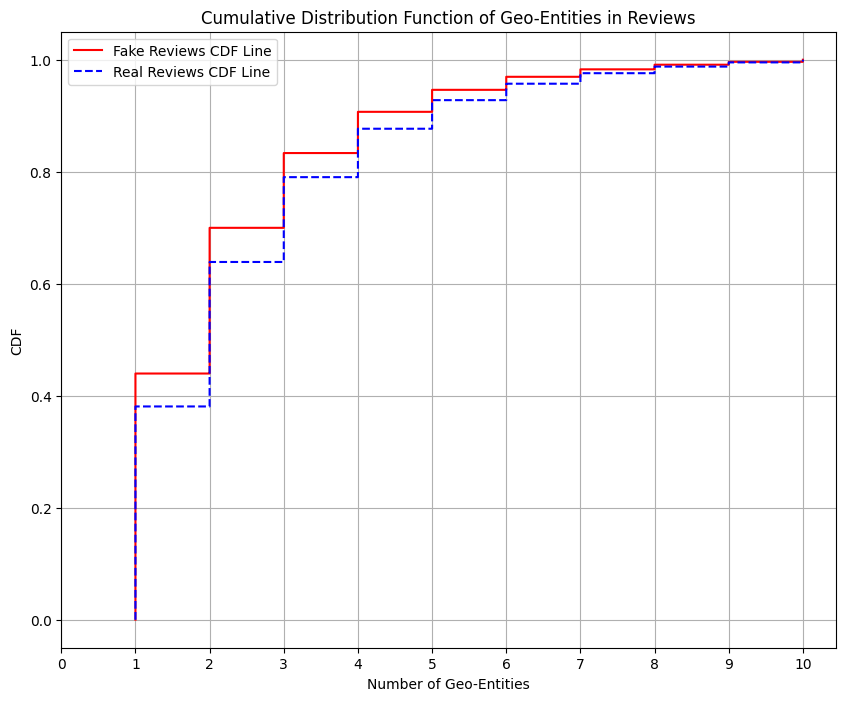

Total number of geo-entities in fake reviews: 60450
Total number of geo-entities in real reviews: 513449
Most common geo-entities in combined reviews:
nyc: 21604
N: 14815
new york: 13400
philly: 11336
brooklyn: 10025
manhattan: 7614
yelp: 7068
philadelphia: 6650
ny: 6034
chinatown: 4974


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load the fake and real data from files
with open(fake_counts_path, 'rb') as f:
    geo_entity_counts_fake = pickle.load(f)

with open(fake_list_path, 'rb') as f:
    geo_entities_list_fake = pickle.load(f)

# Load the real data from files
with open(real_counts_path, 'rb') as f:
    geo_entity_counts_real = pickle.load(f)

with open(real_list_path, 'rb') as f:
    geo_entities_list_real = pickle.load(f)


# Combine both fake and real geo-entity counts
geo_entity_counts_combined = geo_entity_counts_fake + geo_entity_counts_real

# Filter data to only include values between 1 and 15
geo_entity_counts_fake_filtered = [count for count in geo_entity_counts_fake if 1 <= count <= 10]
geo_entity_counts_real_filtered = [count for count in geo_entity_counts_real if 1 <= count <= 10]
geo_entity_counts_combined_filtered = [count for count in geo_entity_counts_combined if 1 <= count <= 10]

# Calculate the CDF
sorted_counts_fake = np.sort(geo_entity_counts_fake_filtered)
cdf_fake = np.arange(1, len(sorted_counts_fake) + 1) / len(sorted_counts_fake)

sorted_counts_real = np.sort(geo_entity_counts_real_filtered)
cdf_real = np.arange(1, len(sorted_counts_real) + 1) / len(sorted_counts_real)

# Calculate the CDF for combined reviews
sorted_counts_combined = np.sort(geo_entity_counts_combined_filtered)
cdf_combined = np.arange(1, len(sorted_counts_combined) + 1) / len(sorted_counts_combined)

# Plot the CDF for both fake, real, and combined reviews
plt.figure(figsize=(10, 8))

# Plot CDF for fake reviews
#plt.plot(sorted_counts_fake, cdf_fake, marker='.', linestyle='dashed', label='Fake Reviews CDF Points',color='red')
plt.step(sorted_counts_fake, cdf_fake, where='post', label='Fake Reviews CDF Line',color='red')

# Plot CDF for real reviews
#plt.plot(sorted_counts_real, cdf_real, marker='x', linestyle='dashed', label='Real Reviews CDF Points', color='blue')
plt.step(sorted_counts_real, cdf_real, where='post',linestyle='dashed', label='Real Reviews CDF Line', color='blue')

# Plot CDF for combined reviews
#plt.plot(sorted_counts_combined, cdf_combined, marker='.', linestyle='none', label='Combined Reviews CDF Points', color='green')
#plt.step(sorted_counts_combined, cdf_combined, where='post', label='Combined Reviews CDF Line', color='green')

# Set the x-axis to show integers from 1 to 15
plt.xticks(np.arange(0, 11, 1))

plt.title('Cumulative Distribution Function of Geo-Entities in Reviews')
plt.xlabel('Number of Geo-Entities')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Save the plot to a PDF file
plt.savefig('/content/drive/MyDrive/cdf_plot_non_unique.pdf')

plt.show()

# Count the total number of geo-entities
total_geo_entities_fake = len(geo_entities_list_fake)
total_geo_entities_real = len(geo_entities_list_real)
total_geo_entities_combined = total_geo_entities_fake + total_geo_entities_real
print(f"Total number of geo-entities in fake reviews: {total_geo_entities_fake}")
print(f"Total number of geo-entities in real reviews: {total_geo_entities_real}")
#print(f"Total number of geo-entities in combined reviews: {total_geo_entities_combined}")

# Count the occurrences of each unique geo-entity for combined reviews
geo_entities_list_combined = geo_entities_list_fake + geo_entities_list_real
geo_entities_counter_combined = Counter(geo_entities_list_combined)

# Print the total number of unique geo-entities for combined reviews
#total_unique_geo_entities_combined = len(geo_entities_counter_combined)
#print(f"Total number of unique geo-entities in combined reviews: {total_unique_geo_entities_combined}")

# Print the most common geo-entities in combined reviews
print("Most common geo-entities in combined reviews:")
for geo_entity, count in geo_entities_counter_combined.most_common(10):
    print(f"{geo_entity}: {count}")


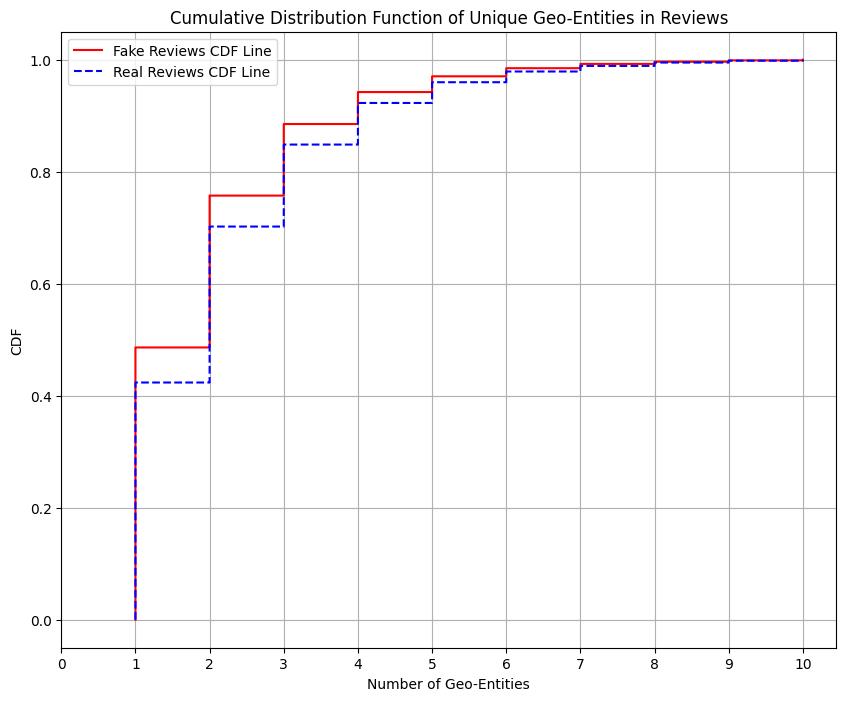

Total number of geo-entities in fake reviews: 52188
Total number of geo-entities in real reviews: 438321
Most common geo-entities in combined reviews:
nyc: 18730
new york: 11723
N: 11296
philly: 9737
brooklyn: 8708
manhattan: 7052
yelp: 6512
philadelphia: 5930
ny: 5218
chinatown: 4128


In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
import pickle

import pickle

# Load the UNIQUE fake and real data from files
with open(fake_unique_counts_path, 'rb') as f:
    geo_entity_counts_fake = pickle.load(f)

with open(fake_unique_list_path, 'rb') as f:
    geo_entities_list_fake = pickle.load(f)

# Load the real data from files
with open(real_unique_counts_path, 'rb') as f:
    geo_entity_counts_real = pickle.load(f)

with open(real_unique_list_path, 'rb') as f:
    geo_entities_list_real = pickle.load(f)

# Combine both fake and real geo-entity counts
geo_entity_counts_combined = geo_entity_counts_fake + geo_entity_counts_real

geo_entity_counts_fake_filtered = [count for count in geo_entity_counts_fake if 1 <= count <= 10]
geo_entity_counts_real_filtered = [count for count in geo_entity_counts_real if 1 <= count <= 10]
geo_entity_counts_combined_filtered = [count for count in geo_entity_counts_combined if 1 <= count <= 10]


# Calculate the CDF
sorted_counts_fake = np.sort(geo_entity_counts_fake_filtered)
cdf_fake = np.arange(1, len(sorted_counts_fake) + 1) / len(sorted_counts_fake)

sorted_counts_real = np.sort(geo_entity_counts_real_filtered)
cdf_real = np.arange(1, len(sorted_counts_real) + 1) / len(sorted_counts_real)

# Calculate the CDF for combined reviews
sorted_counts_combined = np.sort(geo_entity_counts_combined_filtered)
cdf_combined = np.arange(1, len(sorted_counts_combined) + 1) / len(sorted_counts_combined)


# Plot the CDF for both fake, real, and combined reviews
plt.figure(figsize=(10, 8))

# Plot CDF for fake reviews
#plt.plot(sorted_counts_fake, cdf_fake, marker='.', linestyle='none', label='Fake Reviews CDF Points')
plt.step(sorted_counts_fake, cdf_fake, where='post', label='Fake Reviews CDF Line',color='red')

# Plot CDF for real reviews
#plt.plot(sorted_counts_real, cdf_real, marker='.', linestyle='none', label='Real Reviews CDF Points', color='orange')
plt.step(sorted_counts_real, cdf_real, where='post',linestyle='dashed', label='Real Reviews CDF Line', color='blue')

# Plot CDF for combined reviews
#plt.plot(sorted_counts_combined, cdf_combined, marker='.', linestyle='none', label='Combined Reviews CDF Points', color='green')
#plt.step(sorted_counts_combined, cdf_combined, where='post', label='Combined Reviews CDF Line', color='green')

# Set the x-axis to show integers only, iterating by 2
plt.xticks(np.arange(0, 11, 1))

plt.title('Cumulative Distribution Function of Unique Geo-Entities in Reviews')
plt.xlabel('Number of Geo-Entities')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Save the plot to a PDF file
plt.savefig('/content/drive/MyDrive/cdf_plot_unique.pdf')
plt.show()

# Count the total number of geo-entities
total_geo_entities_fake = len(geo_entities_list_fake)
total_geo_entities_real = len(geo_entities_list_real)
total_geo_entities_combined = total_geo_entities_fake + total_geo_entities_real
print(f"Total number of geo-entities in fake reviews: {total_geo_entities_fake}")
print(f"Total number of geo-entities in real reviews: {total_geo_entities_real}")
#print(f"Total number of geo-entities in combined reviews: {total_geo_entities_combined}")

# Count the occurrences of each unique geo-entity for combined reviews
geo_entities_list_combined = geo_entities_list_fake + geo_entities_list_real
geo_entities_counter_combined = Counter(geo_entities_list_combined)

# Print the total number of unique geo-entities for combined reviews
#total_unique_geo_entities_combined = len(geo_entities_counter_combined)
#print(f"Total number of unique geo-entities in combined reviews: {total_unique_geo_entities_combined}")

# Print the most common geo-entities for combined reviews
print("Most common geo-entities in combined reviews:")
for geo_entity, count in geo_entities_counter_combined.most_common(10):
    print(f"{geo_entity}: {count}")

In [ ]:
#Number of geo entites in the fake dataset
len(geo_entities_list_fake)

60450

In [ ]:
#Number of geo entities in the real dataset
len(geo_entities_list_real)

513449

In [ ]:
#Number of reviews in the fake dataset
len(geo_entity_counts)

26870

In [ ]:
#Number of reviews in the real dataset
len(geo_entity_counts_real)

205522

In [ ]:
# Use a set to collect unique geo-entities
geo_entities_set_fake = set()

index = 0
for entry in examples_fake:
    index += 1
    review = entry[0]
    print("Sentence " + str(index) + ": " + entry[0] + "\n")
    doc = nlp_trf(review)
    print("Geo-Entites in Sentence " + str(index) + ": ")
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entities_set_fake.add(ent.text)  # Add to the set, duplicates are ignored
            print(ent.text)
    print("\n")

geo_entities_list_fake = list(geo_entities_set_fake)

Sentence 1: we are local residents . we had high hopes for agricola . local farm to table . ex french laundry chef . i called on a wednesday evening at Npm to see if a table for two was available . " can you hold please . " i was put on hold for N minutes . just as i was about to hang up and call back the hostess came back on the line . i asked for a table for two for tonight . " we can seat you at N Npm . " i accepted the reservation . we arrived at N N and were ignored when standing at the hostess desk . they did not greet us . i finally got one of them acknowledge our reservation for N N and told them we would have a drink in the bar while waiting for our table . the acknowledgement was brisk , cold and unwelcoming . we sat at a community table in the bar . we ordered two martinis . it took longer than it should have to receive our drinks . when the drinks arrived i noticed that they were N N full . the glasses were room temperature . i took a sip . it tasted strongly of a sweet low

100%|██████████| 26870/26870 [14:00<00:00, 31.98it/s]


[4, 1, 3, 1, 1, 3, 2, 2, 1, 1]


100%|██████████| 205522/205522 [2:03:44<00:00, 27.68it/s]


[1, 1, 1, 2, 2, 1, 1, 1, 2, 1]


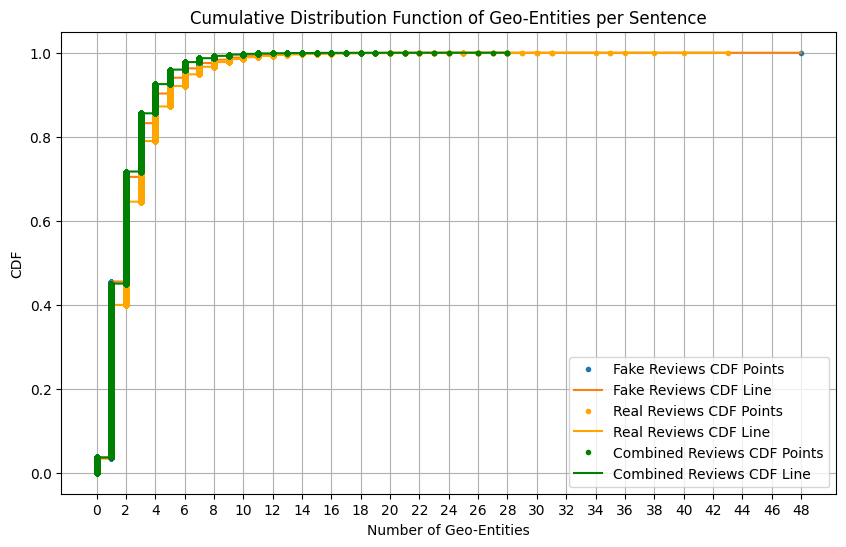

Total number of geo-entities in fake reviews: 52188
Total number of geo-entities in real reviews: 438321
Total number of geo-entities in combined reviews: 490509
Total number of unique geo-entities in combined reviews: 61657
Most common geo-entities in combined reviews:
nyc: 18730
new york: 11723
N: 11296
philly: 9737
brooklyn: 8708
manhattan: 7052
yelp: 6512
philadelphia: 5930
ny: 5218
chinatown: 4128


In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
import pickle

# Define paths to save in Google Drive
drive_path = '/content/drive/My Drive/'
fake_counts_path = drive_path + 'geo_entity_counts_fake.pkl'
fake_list_path = drive_path + 'geo_entities_list_fake.pkl'
real_counts_path = drive_path + 'geo_entity_counts_real.pkl'
real_list_path = drive_path + 'geo_entities_list_real.pkl'

# Ensure GPU support is enabled
spacy.require_gpu()

# Load the NLP model
nlp_trf = spacy.load("en_core_web_trf")

# Process Fake Reviews
geo_entities_list_fake = []  # List to hold geo-entities for fake reviews
geo_entity_counts_fake = []  # List to hold the count of geo-entities per sentence for fake reviews

# For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
for entry in tqdm(examples_fake):
    review = entry[0]  # The actual review
    doc = nlp_trf(review)
    geo_entity_set = set()  # Use a set to store unique geo-entities for this review

    # For each Geo-Entity found in this sentence
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entity = ent.text
            geo_entity_set.add(geo_entity)  # Add to the set to ensure uniqueness

    geo_entities_list_fake.extend(geo_entity_set)  # Append the unique geo-entities to the list
    geo_entity_counts_fake.append(len(geo_entity_set))  # Append the count of unique geo-entities

# Save the fake data to files
with open(fake_counts_path, 'wb') as f:
    pickle.dump(geo_entity_counts_fake, f)

with open(fake_list_path, 'wb') as f:
    pickle.dump(geo_entities_list_fake, f)

# Print some of the geo_entity_counts_fake for verification
print(geo_entity_counts_fake[:10])

# Process Real Reviews
geo_entities_list_real = []  # List to hold geo-entities for real reviews
geo_entity_counts_real = []  # List to hold the count of geo-entities per sentence for real reviews

# For every review in the real review list, check to see if it has any Geo-Entities that are defined below.
for entry in tqdm(examples_real):
    review = entry[0]  # The actual review
    doc = nlp_trf(review)
    geo_entity_set = set()  # Use a set to store unique geo-entities for this review

    # For each Geo-Entity found in this sentence
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entity = ent.text
            geo_entity_set.add(geo_entity)  # Add to the set to ensure uniqueness

    geo_entities_list_real.extend(geo_entity_set)  # Append the unique geo-entities to the list
    geo_entity_counts_real.append(len(geo_entity_set))  # Append the count of unique geo-entities

# Save the real data to files
with open(real_counts_path, 'wb') as f:
    pickle.dump(geo_entity_counts_real, f)

with open(real_list_path, 'wb') as f:
    pickle.dump(geo_entities_list_real, f)

# Print some of the geo_entity_counts_real for verification
print(geo_entity_counts_real[:10])

# Load the fake data from files
with open(fake_counts_path, 'rb') as f:
    geo_entity_counts_fake = pickle.load(f)

with open(fake_list_path, 'rb') as f:
    geo_entities_list_fake = pickle.load(f)

# Load the real data from files
with open(real_counts_path, 'rb') as f:
    geo_entity_counts_real = pickle.load(f)

with open(real_list_path, 'rb') as f:
    geo_entities_list_real = pickle.load(f)

# Combine both fake and real geo-entity counts
geo_entity_counts_combined = geo_entity_counts_fake + geo_entity_counts_real

# Calculate the CDF for combined reviews
sorted_counts_combined = np.sort(geo_entity_counts_combined)
cdf_combined = np.arange(1, len(sorted_counts_combined) + 1) / len(sorted_counts_combined)

# Plot the CDF for both fake, real, and combined reviews
plt.figure(figsize=(18, 12))

# Plot CDF for fake reviews
plt.plot(sorted_counts_fake, cdf_fake, marker='.', linestyle='none', label='Fake Reviews CDF Points')
plt.step(sorted_counts_fake, cdf_fake, where='post', label='Fake Reviews CDF Line')

# Plot CDF for real reviews
plt.plot(sorted_counts_real, cdf_real, marker='.', linestyle='none', label='Real Reviews CDF Points', color='orange')
plt.step(sorted_counts_real, cdf_real, where='post', label='Real Reviews CDF Line', color='orange')

# Plot CDF for combined reviews
plt.plot(sorted_counts_combined, cdf_combined, marker='.', linestyle='none', label='Combined Reviews CDF Points', color='green')
plt.step(sorted_counts_combined, cdf_combined, where='post', label='Combined Reviews CDF Line', color='green')

# Set the x-axis to show integers only, iterating by 2
plt.xticks(np.arange(0, max(max(sorted_counts_fake), max(sorted_counts_real), max(sorted_counts_combined)) + 1, 2))

plt.title('Cumulative Distribution Function of Geo-Entities per Sentence')
plt.xlabel('Number of Geo-Entities')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()
plt.show()

# Count the total number of geo-entities
total_geo_entities_fake = len(geo_entities_list_fake)
total_geo_entities_real = len(geo_entities_list_real)
total_geo_entities_combined = total_geo_entities_fake + total_geo_entities_real
print(f"Total number of geo-entities in fake reviews: {total_geo_entities_fake}")
print(f"Total number of geo-entities in real reviews: {total_geo_entities_real}")
print(f"Total number of geo-entities in combined reviews: {total_geo_entities_combined}")

# Count the occurrences of each unique geo-entity for combined reviews
geo_entities_list_combined = geo_entities_list_fake + geo_entities_list_real
geo_entities_counter_combined = Counter(geo_entities_list_combined)

# Print the total number of unique geo-entities for combined reviews
total_unique_geo_entities_combined = len(geo_entities_counter_combined)
print(f"Total number of unique geo-entities in combined reviews: {total_unique_geo_entities_combined}")

# Print the most common geo-entities for combined reviews
print("Most common geo-entities in combined reviews:")
for geo_entity, count in geo_entities_counter_combined.most_common(10):
    print(f"{geo_entity}: {count}")

In [ ]:
#The list should now only contain unique entities.
print(geo_entities_list_fake)

['aurora', 'queens', 'hoboken', 'habana', 'copperhouse', 'tx', 'passionne', 'wethersfield', 'riverwalk', 'green line pv', 'ave', 'florida', 'shoprite', 'ai fiori', 'west philadelphia', "di fara '", 'nice , france', 'desert', 'nyc', 'fornos', "chef '", 'baltimore ave', 'caske', 'yelp', "c te d ' azur", 'glastonbury', 'N', 'morandi', 'cask republic', 'trenton', 'scratchbread', 'imocha', 'the plan b', 'el paso', 'Nth', 'colorado theater', 'l b spumoni', 'fort greene', 'colorado', 'new york city', 'the halal guys', 'the dutch kills civic association', 'denver', 'hawthorne', 'shahi palace', 'philly', 'bbs', 'phoenix', 'green line', 'N . N per', 'imy', 'nouveau', 'socca', 'riverwalk grill', 'zavino', 'new haven', 'bloomfield avenue', 'chipotle', 'christiana', 'saigon shack', 'cafe renata N', 'vanderbilt', 'ht', 'dinosaur', 'chapel street', "mozzicato ' s", 'garces trading co', "totonno ' s", "govinda ' s", 'bastas', 'raymond blvd', 'city tap house', 'lackawanna plaza', 'costco', 'bayonne', '

In [ ]:
import pickle
#FakeGeoEntitiesList = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/FakeGeoEntitiesList.pkl'
FakeGeoEntitiesList = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_FakeGeoEntitiesList.pkl'
with open(FakeGeoEntitiesList, 'wb') as file:
    pickle.dump(geo_entities_list_fake, file)

In [ ]:
#import pickle
#with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/Yelp_dataset_separated/yelp_real_ns.pkl', 'rb') as file:
#    loaded_list = pickle.load(file)
#
##Just to see what the data looks like here
#print(loaded_list[:5])

[("i have been here a couple of times and i have had negative experiences each time . the latest was yesterday when i ordered the chicken panini . the boneless thigh meat was severely undercooked and pink . i discovered after a few bites in , and the waiter took the plate away and offered to get me something else . too bad i already had a couple of bites . i am now home sick thanks to food poisoning . poultry needs to be cooked thoroughly and not mildly seared like steak . i have been sick all morning and can ' t believe i paid that much to miss work the next day and now be sick all day . never again ! ", '0'), ('my wife and i went there with such great expectations . she had done a lot of research , trying to surprise me for a romantic night-out . she had read many reviews and was raving about this place while we were driving . every one was saying how outstanding the food was and giving it thumbs up for decor and service . our experience was not as good as what we expected . the tuna

In [ ]:
import pickle

# Open the file for reading
with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/FakeGeoEntitiesList.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

# Now loaded_list contains the geo-entities
print(loaded_list)

["w ' burg", 'aurora', 'serpico', 'montreal', 'the gramercy tavern', 'cuban pete', 'rhode island', 'saigon', "chef '", 'malagueta', 'modern apizza', 'michelin', "eno terra '", 'cask republic', 'el paso', 'sdc', 'colorado', 'le cirque', 'denver', 'bbs', 'walnut', 'il babbo', 'imy', 'riverwalk grill', 'zavino', "tink ' s", 'bistango', 'de novo', 'burger baby', 'the millennium dance complex', 'austria', 'garces trading co', 'lackawanna plaza', 'the brasilia grill', 'ferry st barbeque', 'monument lane', 'pyt N', 'pazzo', 'eastman', 'the lebanon opera house', 'the west side highway', 'market st', 'N-N Nam', 'a new yorker', 'oak haven', 'magnolia', '" witherspoon bread company "', 'dc', 'han dynasty', 'germany', 'long island', 'hershey park', "jim dandy ' s", 'commerce on commerce street', "sally ' s", 'williston', 'blackeyedsallys', 'uk', "stan ' s", 'the empire diner', "west hartford '", 'singapore', 'rt N', 'lulu po', 'tierney', 'times square', 'east coast', 'percy street barbeque', 'midt

In [ ]:
# Outdated, use the cell below.
# #Using OpenStreeMaps api, gather the coordinates for each geo-entitiy.
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="Geo-Entity Master Project")


# coordinates_dict = {}

# for entity in geo_entities_list:
#     try:
#       location = geolocator.geocode(entity)
#       if location:
#           coordinates_dict[entity] = (location.latitude, location.longitude)
#           print(f"{entity}: {location.latitude}, {location.longitude}")
#       else:
#           print(f"Location not found for {entity}")
#     except Exception as e:
#       print(f"Error geocoding {entity}: {e}")


In [ ]:
#MODIFIED VERSION: Only pulls the Geo-Entities from New York.
#TODO - Update this cell to remove any entity name that is non-alpha-numeric and Geo-entities that do not have a place name or coordinate
import re
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Geo-Entity Master Project")

coordinates_dict_fake = {}

def is_alpha_numeric(entity):
    return re.match("^[a-zA-Z0-9\s]+$", entity)

for entity in geo_entities_list_fake:
    if not is_alpha_numeric(entity):
        print(f"Skipping non-alpha-numeric entity: {entity}")
        continue
    if len(entity) < 3:
        print(f"Skipping entity with length less than 3: {entity}")
        continue
    try:
        # Limit the search within New York during the geocoding request
        location = geolocator.geocode(f"{entity}, New York")
        if location:
            if 'New York' in location.address:
                coordinates_dict_fake[entity] = (location.latitude, location.longitude)
                print(f"{entity}: {location.latitude}, {location.longitude}")
            else:
                print(f"{entity} found, but not in New York")
        else:
            print(f"Location not found for {entity}")
    except Exception as e:
        print(f"Error geocoding {entity}: {e}")

aurora: 42.7324505, -78.6315537
queens: 40.7135078, -73.8283132
hoboken: 42.6270181, -75.3223928
habana: 40.7228449, -73.9942284
Location not found for copperhouse
Skipping entity with length less than 3: tx
Location not found for passionne
wethersfield: 42.6521201, -78.2499588
riverwalk: 42.0994424, -75.915653
Location not found for green line pv
ave: 1.2545643, 103.8212738
florida: 42.8904161, -74.196582
shoprite: 40.6267325, -73.97712097348416
Location not found for ai fiori
Location not found for west philadelphia
Skipping non-alpha-numeric entity: di fara '
Skipping non-alpha-numeric entity: nice , france
Location not found for desert
nyc: 40.7127281, -74.0060152
Location not found for fornos
Skipping non-alpha-numeric entity: chef '
baltimore ave: 40.6863577, -73.4634619
Location not found for caske
Location not found for yelp
Skipping non-alpha-numeric entity: c te d ' azur
glastonbury: 43.0290971, -77.707679
Skipping entity with length less than 3: N
morandi: 40.7353587, -74.00

N N N: 40.7127281, -74.0060152
Location not found for abbaye
Skipping non-alpha-numeric entity: the moan and dove '
devon: 40.9914899, -72.1070204
Location not found for the moan and dove
Skipping non-alpha-numeric entity: geno ' s
Location not found for p tes et traditions
Skipping non-alpha-numeric entity: miya ' s
Location not found for hu kitchen
philadelphia: 44.154622, -75.708847
Skipping non-alpha-numeric entity: jimmy ' s
Skipping non-alpha-numeric entity: becco ' s
long island: 40.85149705, -73.0994258107431
rubirosa: 40.7227225, -73.9961142
Location not found for cafe clave
Location not found for damons restaurant
yale: 42.8064569, -76.9199618
Location not found for gordon ramsey
Location not found for salt creek grille


Location not found for spring street N subway
roosevelt island: 40.76133675, -73.95028526170718
almond: 42.3222916, -77.738327
queens manhattan: 40.75002325, -73.93634871866918
boston: 42.6289858, -78.7376213
Location not found for ameti
paesano: 40.7185789, -73.997542
Location not found for barbuzzo
san antonio: 40.6619515, -73.6994873
Location not found for visitphilly


Location not found for N Npm
Location not found for trenton social
Location not found for new york magazine
Location not found for qu bec city
Location not found for conservative tours


Location not found for fornos of spain
prime N: 41.4902681, -74.1779324
tierney: 42.613991, -73.846711
brunch: 40.783395, -73.9799783
hartford: 43.363967, -73.4052888
Location not found for cth
tavern: 40.7033938, -74.0113353057346
Skipping entity with length less than 3: tk
mesquite: 40.7617883, -73.9108432
Skipping non-alpha-numeric entity: lombardi ' s


clinton street bakery: 40.7211788, -73.9838832
Location not found for az stronghold
Skipping entity with length less than 3: jg
Location not found for gotham blare
princeton: 40.738646, -73.86054903964195
heavy woods: 40.7056487, -73.9216186
basta: 40.7555436, -73.98468630439257
Location not found for dosa express
Skipping non-alpha-numeric entity: jose ' s
Skipping non-alpha-numeric entity: ameti ' s


Location not found for N N N hour


Location not found for agricola
Location not found for great american bistro
terminal market: 40.64348415, -73.91597200510382
Location not found for amada
Skipping non-alpha-numeric entity: paesano '
newark: 43.0467301, -77.0952516
midwood: 40.6188823, -73.9654889
Location not found for verlaines
Location not found for philadelphia tourism
pathmark: 40.6354288, -73.93684759750955
Location not found for harvest table
Location not found for central new jersey
burlington: 42.7228512, -75.1254387
Location not found for houston
ccse: 42.1571225, -78.73106699360247
Location not found for parsippany
williamsburg: 40.714622, -73.95345
france found, but not in New York
Skipping non-alpha-numeric entity: stefano ' s
Location not found for palace at the ben
Skipping entity with length less than 3: ny
Skipping non-alpha-numeric entity: patsy ' s
Skipping entity with length less than 3: nj
Location not found for Nst nyc
Skipping non-alpha-numeric entity: grimaldi ' s
manhattan: 40.788655250000005, 

rooftop N: 40.743554, -74.0108072


In [ ]:
print(coordinates_dict_fake)

{'aurora': (42.7324505, -78.6315537), 'montreal': (43.115928, -77.589363), 'rhode island': (42.6789568, -75.7996365), 'saigon': (40.7289293, -74.000965), 'malagueta': (40.7578849, -73.9321866), 'el paso': (40.7952819, -73.9452985), 'denver': (42.2125871, -74.5693201), 'bbs': (40.6763094, -73.7405562), 'walnut': (43.0282721, -77.4794543), 'bistango': (40.7563844, -73.9713268), 'de novo': (32.377435, -106.4936378), 'austria': (48.0378872, 14.4175006), 'monument lane': (41.028267, -72.208382), 'eastman': (43.157478999999995, -77.60113082908458), 'market st': (40.859271, -73.0856788), 'a new yorker': (43.064593, -75.761775), 'magnolia': (42.1750574, -79.4400478), 'han dynasty': (40.7322044, -73.9882118), 'germany': (48.3905537, 9.995567138990825), 'long island': (40.85149705, -73.0994258107431), 'williston': (42.8275599, -78.5164117), 'singapore': (40.736308750000006, -73.86109847714846), 'tierney': (42.613991, -73.846711), 'times square': (40.757261400000004, -73.98589982948505), 'east co

In [ ]:
#Turn that dictionary into a csv file
#CoordinatesFilename = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/FakeCoordinateList.csv'
CoordinatesFilename = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_FakeCoordinateList.csv'

with open(CoordinatesFilename, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['row_id','name', 'latitude', 'longitude'])
    row_id = 0

    # Write the data rows
    for name, (latitude, longitude) in coordinates_dict_fake.items():
        writer.writerow([row_id, name, latitude, longitude])
        row_id += 1

print(f"CSV file '{CoordinatesFilename}' created successfully.")

CSV file '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_FakeCoordinateList.csv' created successfully.


In [ ]:
state_frame = pd.read_csv(CoordinatesFilename)


# construct list of names and coordinates from data
name_list = []
coordinate_list = []
for i, item in state_frame.iterrows():
    name = item[1]
    lat = item[2]
    lng =item[3]
    name_list.append(name)
    coordinate_list.append([lng,lat])


# construct KDTree out of coordinates list for when we make the neighbor lists
import scipy.spatial as scp

ordered_neighbor_coordinate_list = scp.KDTree(coordinate_list)

In [ ]:
state_frame

row_id                 name   latitude  longitude
0         0               aurora  42.732450 -78.631554
1         1               queens  40.713508 -73.828313
2         2              hoboken  42.627018 -75.322393
3         3               habana  40.722845 -73.994228
4         4         wethersfield  42.652120 -78.249959
..      ...                  ...        ...        ...
106     106            wikipedia   8.391969 -13.131562
107     107             brooklyn  40.652601 -73.949721
108     108              batavia  42.998014 -78.187551
109     109  the south of france  40.831752 -73.866212
110     110            rooftop N  40.743554 -74.010807

[111 rows x 4 columns]

In [ ]:
## Get top 20 nearest neighbors for each entity in dataset
#with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_data_fake.json', 'w') as out_f:
with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_SPABERT_data_fake.json', 'w') as out_f:
    for i, item in state_frame.iterrows():
        name = item[1]
        lat = item[2]
        lng = item[3]
        coordinates = [lng,lat]

        _, nearest_neighbors_idx = ordered_neighbor_coordinate_list.query([coordinates], k=21)

        # we want to store their names and coordinates

        nearest_neighbors_name = []
        nearest_neighbors_coords = []

        # iterate over nearest neighbors list
        for idx in nearest_neighbors_idx[0]:
            # get name and coordinate of neighbor
            neighbor_name = name_list[idx]
            neighbor_coords = coordinate_list[idx]
            nearest_neighbors_name.append(neighbor_name)
            nearest_neighbors_coords.append({"coordinates": neighbor_coords})

        # construct neighbor info dictionary object for SpaBERT embedding construction
        neighbor_info = {"name_list":nearest_neighbors_name, "geometry_list":nearest_neighbors_coords}


        # construct full dictionary object for SpaBERT embedding construction
        place = {"info":{"name":name, "geometry":{"coordinates": coordinates}}, "neighbor_info":neighbor_info}

        out_f.write(json.dumps(place))
        out_f.write('\n')

Real Review Section

In [ ]:
#MODIFIED VERSION. ONLY PULLS UNIQUE GEO-ENTITIES AND NOT THE SENTENCE.
#Create two lists that will hold spatial and non-spatial reviews.
geo_entities_list_real = []   # List to hold geo-entities
index = 0

#comment out when not making a test set
examples_real = examples_real_test

#For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
for entry in examples_real:
  index+=1
  review = entry[0]   #The actual review
  if True:
    print("Sentence " + str(index) + ": " + entry[0] + "\n")
    doc = nlp_trf(review)
    # for each Geo-Entity found in this sentence
    print("Geo-Entites in Sentence " + str(index) + ": ")
    for ent in doc.ents:
      if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
        geo_entity = ent.text
        geo_entities_list_real.append(geo_entity) # Append the geo-entity to the end of the list
        print(geo_entity)
        #break
    print("\n")

Sentence 1: we went here over the weekend . i have been to houston ' s in orlando and so was expecting a good dining experience . they certainly delivered good food and service to our table of N . amongst us we tried the steak and the seafood offerings along with some sushi for the appetizers . our waiter seemed new but was certainly pleasant and made up for his lack of experience with his enthusiasm . the atmosphere was typical to most upscale steakhouses - dim lighting , leather and plenty of wood . something small that bothered me was the way the hostess dealt with a specific situation about attire . we were all dressed appropriately and during the course of dinner i was presented with a baseball cap . i tried it on briefly and had it on for less than a couple of minutes when the hostess swung by and informed me rather loudly that i was in violation of their dress code . i had no issue with the request but the manner in which it was conveyed could have been more subtle . i complied 

In [ ]:
#Notice that there are duplicates in this list.
print(geo_entities_list_real)

["houston ' s", 'orlando', 'tria', 'tria', 'rittenhouse', 'new york city', 'pennsylvania', 'new york city', 'new york', 'philadelphia', 'yale', 'gypsy', "the N ' s", 'hearth', 'san francisco', 'new york', 'hearth', 'new york', 'N', 'philly', 'eagles', 'philly', "joe ' s", "jim ' s", 'philly', "peaches hothouse '", 'peaches', 'wing', 'wing', 'peaches', 'astoria', 'brooklyn', "le p ' tit paris bistro", 'finlay', 'finlay', 'katy perry', 'tres carnes', 'chipotle', 'tres carnes', 'states', 'thaitown la', 'thai', 'mad mex', 'yelp', 'Nnd street', 'kansas', 'Nth avenue', 'manhattan', 'westin', 'Nrd', 'Nhotel', 'krimpton', 'Npm', 'manhattan', 'epa superfund', 'get fresh', 'connecticut', 'massachusetts', 'east hartford', 'cha-kwai chinese fried crullers', 'hartford', 'kenscale N . N N', 'mas farmhouse', 'delaware and hudson', 'williamsburg', 'N', 'brooklyn', 'delaware and hudson', 'nyc', 'hillbilly', 'jj bootleggers', 'philly', 'cha-', 'nyc yelp', 'the c . o . t', 'yelp', 'yelp', 'cha-', 'atif i

In [ ]:
# Use a set to collect unique geo-entities
geo_entities_set_real = set()

index = 0
for entry in examples_real:
    index += 1
    review = entry[0]
    print("Sentence " + str(index) + ": " + entry[0] + "\n")
    doc = nlp_trf(review)
    print("Geo-Entites in Sentence " + str(index) + ": ")
    for ent in doc.ents:
        if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
            geo_entities_set_real.add(ent.text)  # Add to the set, duplicates are ignored
            print(ent.text)
    print("\n")

geo_entities_list_real = list(geo_entities_set_real)

Sentence 1: we went here over the weekend . i have been to houston ' s in orlando and so was expecting a good dining experience . they certainly delivered good food and service to our table of N . amongst us we tried the steak and the seafood offerings along with some sushi for the appetizers . our waiter seemed new but was certainly pleasant and made up for his lack of experience with his enthusiasm . the atmosphere was typical to most upscale steakhouses - dim lighting , leather and plenty of wood . something small that bothered me was the way the hostess dealt with a specific situation about attire . we were all dressed appropriately and during the course of dinner i was presented with a baseball cap . i tried it on briefly and had it on for less than a couple of minutes when the hostess swung by and informed me rather loudly that i was in violation of their dress code . i had no issue with the request but the manner in which it was conveyed could have been more subtle . i complied 

In [ ]:
print(geo_entities_list_real)

['chinatown', 'epa superfund', 'japan', 'potlikker', 'rome', 'tria', 'k-', 'duane reade', 'hell', "sabrina '", 'hoboken', 'les italian', 'washington state', 'maharlika', 'the Nth street subway stop', 'cali', 'reading terminal market', 'park slope', 'nyc', 'cha-an', "mamoun ' s", 'east village', 'nice green bo', "ramen bar '", 'hanco', 'yelp', 'rt . N', 'collingswood', 'N', 'the c . o . t', 'lake trout', 'pho N', 'get fresh', 'la patria', "rembrandt ' s", 'N-', 'michelin', 'soju', "penn '", 'trio', 'five leaves', "hanco ' s", 'cafe con leche', 'Nhotel', 'connecticut', 'colorado', 'new york city', 'hearth', 'jj bootleggers', "peaches hothouse '", 'avenue b', 'woorijip', 'bloomfield ave', 'Npm', 'traif', 'tres carnes', 'philly', "jim ' s", 'san francisco', 'wing', 'cha-', 'shanghi', 'vientiane', 'fraunces', 'callowhill street', 'laos', 'home depot', 'paree', 'banh mi', 'comidas mexicanas', "bubby ' s", 'india', 'N stars', 'new haven', 'peaches', 'chipotle', 'astoria', 'greenwich village',

In [ ]:
import pickle
#RealGeoEntitiesList = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/RealGeoEntityList.pkl'
RealGeoEntitiesList = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_RealGeoEntitiesList.pkl'
with open(RealGeoEntitiesList, 'wb') as file:
    pickle.dump(geo_entities_set_real, file)

In [ ]:
import pickle

# Open the file for reading
with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/RealGeoEntitiesList.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

# Now loaded_list contains the geo-entities
print(loaded_list)

{'graceland', 'cedar point !', 's Nth street', "the N ' s", 'texas', 'independence mall', 'yelp hq', "pats geno ' s", 'long island', 'grimaldis', "mcdonald '", 'us', 'allentown', 'batmans', 'pepsi', 'hershey park', 'pats vs genos', 'pagano', "teddy ' s", 'manayunk', "N - geno '", 'the N N', 'denapoli', 'bbq', 'verona', 'congress', 'full plate', 'toms diner', "jim ' s steak ' s", "the bishop ' s collar", 'rioja', "philly ' s", 'california', 'pr', 'broadway', 'bologna', 'new jersey', "oliveri ' s", "N - sonny '", 'la', 'iowa', "sonny ' s", 'genos', 'aprilsims', 'ford', 'amoroso', 'charlottesville', 'coney island', 'the liberty bell N', 'sammiches', 'majors', 'east harlem', 'the " bronx " new', 'tropical breeze', 'tuckahoe bike shop', 'N star', 'chhaya', 'nolibs', 'maryland', 'kraft corporation', 'morningstar', 'memphis taproom', "tony luke ' s", "the new yorker '", 'warsaw cafe', 'richmond', 'shore cycle club', 'pbs specials', 'supermarkets', 'jims', 'cs', 'tropical paradise', 'madrid', 

In [ ]:
#MODIFIED VERSION: Only pulls the Geo-Entities from New York.
#TODO - Update this cell to remove any entity name that is non-alpha-numeric and Geo-entities that do not have a place name or coordinate
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Geo-Entity Master Project")

coordinates_dict_real = {}

def is_alpha_numeric(entity):
    return re.match("^[a-zA-Z0-9\s]+$", entity)

for entity in geo_entities_list_real:
    if not is_alpha_numeric(entity):
        print(f"Skipping non-alpha-numeric entity: {entity}")
        continue
    if len(entity) < 3:
        print(f"Skipping entity with length less than 3: {entity}")
        continue
    try:
        # Limit the search within New York during the geocoding request
        location = geolocator.geocode(f"{entity}, New York")
        if location:
            if 'New York' in location.address:
                coordinates_dict_real[entity] = (location.latitude, location.longitude)
                print(f"{entity}: {location.latitude}, {location.longitude}")
            else:
                print(f"{entity} found, but not in New York")
        else:
            print(f"Location not found for {entity}")
    except Exception as e:
        print(f"Error geocoding {entity}: {e}")

chinatown: 40.7164913, -73.9962504
epa superfund: 40.75823715, -73.50466691218668
japan found, but not in New York
Location not found for potlikker
rome: 43.2128473, -75.4557304
Location not found for tria
Skipping non-alpha-numeric entity: k-
duane reade: 40.7191935, -73.9631438
hell: 40.7644228, -73.9923918
Skipping non-alpha-numeric entity: sabrina '
hoboken: 42.6270181, -75.3223928
Location not found for les italian
washington state: 43.2294536, -73.4471343
maharlika: 15.1852346, 120.5835278
Location not found for the Nth street subway stop
cali: 43.1234151, -77.4273854
Location not found for reading terminal market
park slope: 40.6701033, -73.9859723
nyc: 40.7127281, -74.0060152
Skipping non-alpha-numeric entity: cha-an
Skipping non-alpha-numeric entity: mamoun ' s
east village: 40.7292688, -73.9873613
Location not found for nice green bo
Skipping non-alpha-numeric entity: ramen bar '
hanco: 40.6946693, -73.9933733
Location not found for yelp
Skipping non-alpha-numeric entity: rt 

lotus: 40.7371984, -73.7096252
Location not found for turkey club
Location not found for le bec fin
Location not found for redskins
Location not found for twoNtwo
Skipping non-alpha-numeric entity: eagles-redskins
Skipping non-alpha-numeric entity: honey ' s
finlay: 42.954064, -74.174585
china: 42.1448051, -75.4001772
doma: 40.7442007, -73.9230967
states: 40.7435215, -73.84472378323667
Location not found for the vientiane cafe
williamsburg: 40.714622, -73.95345
vic: 42.719655, -73.914136
Skipping entity with length less than 3: ny
delaware and hudson: 41.8250284, -74.1382742
usa: 40.7127281, -74.0060152
Location not found for Nnd street
Location not found for Nth avenue
europe: 40.704476, -74.01381414642856
continental: 40.8515357, -73.8302801
hanover: 42.5030037, -79.1058731
Location not found for milkboy
Location not found for piolin jr
manhattan: 40.788655250000005, -73.9603027827792
sesame: 42.458836, -73.535342
Location not found for caf
motorino: 40.7104673, -73.9635085
east newa

alta: 48.0378872, 14.4175006
Location not found for indeblue
Skipping non-alpha-numeric entity: dingle ' s
hamilton: 43.6307863, -74.4659275
Location not found for gordon ramsay
Skipping non-alpha-numeric entity: e .
Skipping entity with length less than 3: bf
fish: 40.7317185, -74.0034012
chelsea: 40.7464906, -74.0015283
N N: 40.7127281, -74.0060152
kansas: 40.738038700000004, -73.85933288396191
Location not found for mad mex
Location not found for the main st
Skipping non-alpha-numeric entity: krupa ' s
Location not found for ssam and ko
Location not found for cantina dos segundos
Location not found for shanghai cafe
south street: 40.7102983, -73.9883192
Skipping non-alpha-numeric entity: kenscale N . N N
beck: 42.0403044, -74.1204521
sally: 44.0245295, -73.8133514
Location not found for chicago
porterhouse: 40.70341975, -74.011184831539
the theatre district: 40.7622484, -73.9853553
italy: 42.611735, -77.2919246
columbia: 42.2415027, -73.6723456
center city: 14.7016101, 121.0068411
S

sentosa: 1.2545643, 103.8212738
tribeca: 40.7153802, -74.0093063
Skipping non-alpha-numeric entity: le p ' tit paris bistro
wawa: 39.4922892, -74.4574975
Location not found for aksum
orlando: 42.3045078, -78.7161416
bbq: 40.7480141, -73.9872738
Skipping non-alpha-numeric entity: brown and taney st ' s
Skipping non-alpha-numeric entity: mcdonald ' s
westside: 42.0956092, -75.93094
around N N am: 41.5687234, -74.4941955
Location not found for katy perry
Location not found for nolibs Nth street


Location not found for grimaldis
wikipedia: 8.391969249999999, -13.131562399820279


Location not found for nyc yelp
Location not found for yelper
brooklyn: 40.6526006, -73.9497211
Location not found for krimpton
Location not found for Ns thievery corporation school
west windsor: 42.098966, -75.764078
gowanus: 40.6791695, -73.9885041
Location not found for ramen boy
Location not found for Nrd
Location not found for california uni
Location not found for la isla
erawan: 43.05399075, -76.09692742547581
Location not found for byob


In [ ]:
print(coordinates_dict_real)

{'chinatown': (40.7164913, -73.9962504), 'epa superfund': (40.75823715, -73.50466691218668), 'rome': (43.2128473, -75.4557304), 'duane reade': (40.7191935, -73.9631438), 'hell': (40.7644228, -73.9923918), 'hoboken': (42.6270181, -75.3223928), 'washington state': (43.2294536, -73.4471343), 'maharlika': (15.1852346, 120.5835278), 'cali': (43.1234151, -77.4273854), 'park slope': (40.6701033, -73.9859723), 'nyc': (40.7127281, -74.0060152), 'east village': (40.7292688, -73.9873613), 'hanco': (40.6946693, -73.9933733), 'collingswood': (40.9843564, -72.2838868), 'lake trout': (43.2700697, -74.5370891), 'pho N': (34.0143928, -117.898451), 'get fresh': (40.7054469, -73.9063679), 'soju': (40.7470064, -73.9853791), 'trio': (42.6499996, -73.7595826), 'five leaves': (40.723735950000005, -73.95164194773636), 'cafe con leche': (41.5872995, -73.9485899), 'connecticut': (42.3864621, -76.6691152), 'new york city': (40.7127281, -74.0060152), 'hearth': (40.7300338, -73.9832859), 'avenue b': (40.7216209, -

In [ ]:
#Turn that dictionary into a csv file
#CoordinatesFilename = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/RealCoordinatesList.csv'
CoordinatesFilename = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_RealCoordinatesList.csv'

with open(CoordinatesFilename, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['row_id','name', 'latitude', 'longitude'])
    row_id = 0

    # Write the data rows
    for name, (latitude, longitude) in coordinates_dict_real.items():
        writer.writerow([row_id, name, latitude, longitude])
        row_id += 1

print(f"CSV file '{CoordinatesFilename}' created successfully.")

CSV file '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_RealCoordinatesList.csv' created successfully.


In [ ]:
##We won't need this anymore as we are combining the files
state_frame = pd.read_csv(CoordinatesFilename)


# construct list of names and coordinates from data
name_list = []
coordinate_list = []
for i, item in state_frame.iterrows():
    name = item[1]
    lat = item[2]
    lng =item[3]
    name_list.append(name)
    coordinate_list.append([lng,lat])


# construct KDTree out of coordinates list for when we make the neighbor lists
import scipy.spatial as scp

ordered_neighbor_coordinate_list = scp.KDTree(coordinate_list)

In [ ]:
state_frame

row_id           name   latitude  longitude
0         0      chinatown  40.716491 -73.996250
1         1  epa superfund  40.758237 -73.504667
2         2           rome  43.212847 -75.455730
3         3    duane reade  40.719194 -73.963144
4         4           hell  40.764423 -73.992392
..      ...            ...        ...        ...
140     140      wikipedia   8.391969 -13.131562
141     141       brooklyn  40.652601 -73.949721
142     142   west windsor  42.098966 -75.764078
143     143        gowanus  40.679170 -73.988504
144     144         erawan  43.053991 -76.096927

[145 rows x 4 columns]

In [ ]:
##We won't need this cell anymore as we are combining the files
## Get top 20 nearest neighbors for each entity in dataset
#with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_data_real.json', 'w') as out_f:
with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_SPABERT_data_real.json', 'w') as out_f:

    for i, item in state_frame.iterrows():
        name = item[1]
        lat = item[2]
        lng = item[3]
        coordinates = [lng,lat]

        _, nearest_neighbors_idx = ordered_neighbor_coordinate_list.query([coordinates], k=21)

        # we want to store their names and coordinates

        nearest_neighbors_name = []
        nearest_neighbors_coords = []

        # iterate over nearest neighbors list
        for idx in nearest_neighbors_idx[0]:
            # get name and coordinate of neighbor
            neighbor_name = name_list[idx]
            neighbor_coords = coordinate_list[idx]
            nearest_neighbors_name.append(neighbor_name)
            nearest_neighbors_coords.append({"coordinates": neighbor_coords})

        # construct neighbor info dictionary object for SpaBERT embedding construction
        neighbor_info = {"name_list":nearest_neighbors_name, "geometry_list":nearest_neighbors_coords}


        # construct full dictionary object for SpaBERT embedding construction
        place = {"info":{"name":name, "geometry":{"coordinates": coordinates}}, "neighbor_info":neighbor_info}

        out_f.write(json.dumps(place))
        out_f.write('\n')

# Combine Real and Fake coordinate datasets to Fine-Tune SpaBert
We can ignore the SPABERT_finetuning_data_real.json and SPABERT_finetuning_data_fake.json files as they are leftovers from previous iterations. We will be using the coordinate files and combining them into a single file for training.

In [ ]:
import pandas as pd

# Path to the JSON files
#path_real = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/RealCoordinatesList.csv'
path_real = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_RealCoordinatesList.csv'
#path_fake = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/FakeCoordinateList.csv'
path_fake = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_FakeCoordinateList.csv'

# Load the JSON files into DataFrames
df1 = pd.read_csv(path_real)
df2 = pd.read_csv(path_fake)

combined_df = pd.concat([df1, df2], ignore_index=True)
#combined_df.to_csv('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/CombinedCoordinatesList.csv', index=False)
combined_df.to_csv('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_CombinedCoordinatesList.csv', index=False)

In [ ]:
import pandas as pd
#combinedFilePath = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/CombinedCoordinatesList.csv'
combinedFilePath = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_CombinedCoordinatesList.csv'
state_frame = pd.read_csv(combinedFilePath)


# construct list of names and coordinates from data
name_list = []
coordinate_list = []
for i, item in state_frame.iterrows():
    name = item[1]
    lat = item[2]
    lng =item[3]
    name_list.append(name)
    coordinate_list.append([lng,lat])


# construct KDTree out of coordinates list for when we make the neighbor lists
import scipy.spatial as scp

ordered_neighbor_coordinate_list = scp.KDTree(coordinate_list)

In [ ]:
state_frame

row_id                 name   latitude  longitude
0         0            chinatown  40.716491 -73.996250
1         1        epa superfund  40.758237 -73.504667
2         2                 rome  43.212847 -75.455730
3         3          duane reade  40.719194 -73.963144
4         4                 hell  40.764423 -73.992392
..      ...                  ...        ...        ...
251     106            wikipedia   8.391969 -13.131562
252     107             brooklyn  40.652601 -73.949721
253     108              batavia  42.998014 -78.187551
254     109  the south of france  40.831752 -73.866212
255     110            rooftop N  40.743554 -74.010807

[256 rows x 4 columns]

In [ ]:
import json
import uuid
# Get top 20 nearest neighbors for each entity in dataset
#with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_Coordinate_data_combined.json', 'w') as out_f:
with open('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_SPABERT_Coordinate_data_combined.json', 'w') as out_f:
    for i, item in state_frame.iterrows():
        name = item[1]
        lat = item[2]
        lng = item[3]
        coordinates = [lng,lat]

        #comment this out if not making test data
        qid = str(uuid.uuid4())
        _, nearest_neighbors_idx = ordered_neighbor_coordinate_list.query([coordinates], k=21)

        # we want to store their names and coordinates

        nearest_neighbors_name = []
        nearest_neighbors_coords = []

        # iterate over nearest neighbors list
        for idx in nearest_neighbors_idx[0]:
            # get name and coordinate of neighbor
            neighbor_name = name_list[idx]
            neighbor_coords = coordinate_list[idx]
            nearest_neighbors_name.append(neighbor_name)
            nearest_neighbors_coords.append({"coordinates": neighbor_coords})

        # construct neighbor info dictionary object for SpaBERT embedding construction
        neighbor_info = {"name_list":nearest_neighbors_name, "geometry_list":nearest_neighbors_coords}


        # construct full dictionary object for SpaBERT embedding construction
        #place = {"info":{"name":name, "geometry":{"coordinates": coordinates}}, "neighbor_info":neighbor_info}
        place = {"info": {"name": name, "geometry": {"coordinates": coordinates}, "qid": qid}, "neighbor_info": neighbor_info}

        out_f.write(json.dumps(place))
        out_f.write('\n')

# Testing New Finetuning for Spabert Without LM


In [ ]:
import sys
models_path = '/content/drive/MyDrive/spaBERT/spabert'
sys.path.append(models_path)
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/spaBERT/spabert', '/content/drive/MyDrive/spaBERT/spabert']


In [ ]:
!pip install ipykernel

In [ ]:
### FINE-TUNE SPABERT
import sys
sys.path.append("../")
import json
import pandas as pd
import scipy.spatial as scp
import torch
from transformers import BertTokenizer, AdamW
from tqdm import tqdm
from torch.utils.data import DataLoader
from models.spatial_bert_model import SpatialBertConfig, SpatialBertModel
from datasets.osm_sample_loader import PbfMapDataset

# load dataset we just created

dataset = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_Coordinate_data_combined.json'

# load pre-trained spabert model

#pretrained_model = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/mlm_mem_keeppos_ep0_iter06000_0.2936.pth'
pretrained_model = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert-base-uncased-finetuned-osm-mn.pth'

# load bert model and tokenizer as well as the SpaBERT config
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = SpatialBertConfig()

# Fine-Tune SpaBert


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


In [ ]:
import sys
models_path = '/content/drive/MyDrive/spaBERT/spabert'
sys.path.append(models_path)
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/spaBERT/spabert']


In [ ]:
!pip install ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [ ]:
### FINE-TUNE SPABERT
import sys
from transformers.models.bert.modeling_bert import BertForMaskedLM
from transformers import BertTokenizer
sys.path.append("../")
from models.spatial_bert_model import SpatialBertConfig
from utils.common_utils import load_spatial_bert_pretrained_weights
from models.spatial_bert_model import  SpatialBertForMaskedLM

# load dataset we just created

dataset = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_Coordinate_data_combined.json'

# load pre-trained spabert model

pretrained_model = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/mlm_mem_keeppos_ep0_iter06000_0.2936.pth'


# load bert model and tokenizer as well as the SpaBERT config
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = SpatialBertConfig()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# load pre-trained spabert model
import torch
model = SpatialBertForMaskedLM(config)

model.load_state_dict(bert_model.state_dict() , strict = False)

pre_trained_model = torch.load(pretrained_model)

model_keys = model.state_dict()
cnt_layers = 0
for key in model_keys:
    if key in pre_trained_model:
        model_keys[key] = pre_trained_model[key]
        cnt_layers += 1
    else:
        print("No weight for", key)
print(cnt_layers, 'layers loaded')

model.load_state_dict(model_keys)

205 layers loaded


<All keys matched successfully>

In [ ]:
sys.path.append('/content/drive/MyDrive/spaBERT/spabert/datasets')

In [ ]:
from datasets.osm_sample_loader import PbfMapDataset
from torch.utils.data import DataLoader
# load fine-tning dataset with data loader

fine_tune_dataset = PbfMapDataset(data_file_path = dataset,
                                        tokenizer = tokenizer,
                                        max_token_len = 300,                #originally 300
                                        distance_norm_factor = 0.0001,
                                        spatial_dist_fill = 20,
                                        with_type = False,
                                        sep_between_neighbors = False,
                                        label_encoder = None,
                                        mode = None)
#initialize data loader
train_loader = DataLoader(fine_tune_dataset, batch_size=12, num_workers=5, shuffle=False, pin_memory=True, drop_last=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
fine_tune_dataset[1]

{'pivot_name': 'rhode island',
 'pivot_token_len': 2,
 'masked_input': tensor([  101,  9763,   103,  9763,  2479,  9763,  2479, 20829, 18996,   103,
          6384,  3077, 18641,   103,  6222,   103, 11265,   103,  2395, 15544,
         25970,  4580,  2675, 15544, 25970,  4580,  5318, 14132, 14425,  1037,
          2047, 19095,   103,  3790, 15544,  5753,  7570,  5092,  7520,  7570,
          5092,  7520, 10090,  9857,   103,  3006,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,    

In [ ]:
import torch
# cast our loaded model to a gpu if one is available, otherwise use the cpu
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# set model to training mode
model.train()

SpatialBertForMaskedLM(
  (bert): SpatialBertModel(
    (embeddings): SpatialEmbedding(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (sent_position_embedding): Embedding(512, 768)
      (spatial_position_embedding): ContinuousSpatialPositionalEmbedding()
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out

In [ ]:
### FINE TUNING PROCEDURE ###
from tqdm import tqdm
from transformers import AdamW
# initialize optimizer
optim = AdamW(model.parameters(), lr = 5e-5)

# setup loop with TQDM and dataloader
epoch = tqdm(train_loader, leave=True)
iter = 0
for batch in epoch:
    # initialize calculated gradients from previous step
    optim.zero_grad()

    # pull all tensor batches required for training
    input_ids = batch['masked_input'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    position_list_x = batch['norm_lng_list'].to(device)
    position_list_y = batch['norm_lat_list'].to(device)
    sent_position_ids = batch['sent_position_ids'].to(device)

    labels = batch['pseudo_sentence'].to(device)

    # get outputs of model
    outputs = model(input_ids, attention_mask = attention_mask, sent_position_ids = sent_position_ids,
                position_list_x = position_list_x, position_list_y = position_list_y, labels = labels)


    # calculate loss
    loss = outputs.loss

    # perform backpropigation
    loss.backward()

    optim.step()
    epoch.set_postfix({'loss':loss.item()})


    iter += 1
torch.save(model.state_dict(), "/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/fine-spabert-base-uncased-finetuned-osm-mn.pth")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/126 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
100%|██████████| 126/126 [01:42<00:00,  1.23it/s, loss=0.101]


# SpaBERT Entity Linking

In [ ]:
wikidata_dataset = WHGDataset(
    data_file_path='/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert_wikidata_sampled.json',
    tokenizer=tokenizer,
    max_token_len=512,
    distance_norm_factor=50000,
    spatial_dist_fill=20,
    sep_between_neighbors=sep_between_neighbors)

In [ ]:
# Create a mapping from wikidata_dataset
wikidata_qid_mapping = {}

for i in range(len(wikidata_dataset)):
    entry = wikidata_dataset[i]
    name = entry['pivot_name'].lower()  # Adjust this if the key is different
    qid = entry['qid']
    wikidata_qid_mapping[name] = qid

In [ ]:
import json
import uuid

def update_qids_in_whg_dataset(file_path, qid_mapping):
    with open(file_path, 'r') as f:
        data = f.readlines()

    updated_data = []
    for line in data:
        entry = json.loads(line)
        name = entry['info']['name'].lower()

        # Update qid if name is found in the mapping
        if name in qid_mapping:
            entry['info']['qid'] = qid_mapping[name]
        else:
            # Keep the existing qid or generate a new one if necessary
            entry['info']['qid'] = entry['info'].get('qid', str(uuid.uuid4()))

        updated_data.append(entry)

    # Save the updated dataset
    with open(file_path, 'w') as f:
        for entry in updated_data:
            f.write(json.dumps(entry) + '\n')

# Path to your WHG dataset
whg_file_path = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_SPABERT_Coordinate_data_combined.json'
update_qids_in_whg_dataset(whg_file_path, wikidata_qid_mapping)

# Now, reload the datasets and proceed with the entity linking process
whg_dataset = WHGDataset(
    data_file_path=whg_file_path,
    tokenizer=tokenizer,
    max_token_len=512,
    distance_norm_factor=25,
    spatial_dist_fill=100,
    sep_between_neighbors=sep_between_neighbors
)

In [ ]:
sys.path.append('/content/drive/MyDrive/spaBERT/spabert/datasets')

In [ ]:
import sys
from transformers import BertTokenizer
from transformers.models.bert.modeling_bert import BertForMaskedLM
import torch
module_path = '/content/drive/MyDrive/spaBERT/spabert/notebooks'

if module_path not in sys.path:
    sys.path.append(module_path)

from WHGDataset import WHGDataset

sys.path.append("../")
from datasets.usgs_os_sample_loader import USGS_MapDataset
from datasets.wikidata_sample_loader import Wikidata_Geocoord_Dataset, Wikidata_Random_Dataset
from models.spatial_bert_model import SpatialBertModel
from models.spatial_bert_model import SpatialBertConfig
from models.spatial_bert_model import  SpatialBertForMaskedLM
from utils.find_closest import find_ref_closest_match, sort_ref_closest_match
from utils.common_utils import load_spatial_bert_pretrained_weights, get_spatialbert_embedding, get_bert_embedding, write_to_csv
from utils.baseline_utils import get_baseline_model


# load our spabert model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

config = SpatialBertConfig()
model = SpatialBertModel(config)

model.to(device)
model.eval()

# load pretrained weights
pre_trained_model=torch.load('/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/fine-spabert-base-uncased-finetuned-osm-mn.pth')
cnt_layers = 0
model_keys = model.state_dict()
for key in model_keys:
    if 'bert.'+ key in pre_trained_model:
        model_keys[key] = pre_trained_model["bert."+key]
        cnt_layers += 1
    else:
        print("No weight for", key)
print(cnt_layers, 'layers loaded')

model.load_state_dict(model_keys)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


No weight for pooler.dense.weight
No weight for pooler.dense.bias
198 layers loaded


<All keys matched successfully>

In [ ]:
# load entity-linking datasets

sep_between_neighbors = False
wikidata_dict_per_map = {}
wikidata_dict_per_map['wikidata_emb_list'] = []
wikidata_dict_per_map['wikidata_qid_list'] = []
wikidata_dict_per_map['names'] = []

#My dataset
whg_dataset = WHGDataset(
    #data_file_path = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert_whg_wikidata.json',
    data_file_path = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/Test_SPABERT_Coordinate_data_combined.json',
    tokenizer = tokenizer,
    max_token_len = 512,
    distance_norm_factor = 25,
    spatial_dist_fill=100,
    sep_between_neighbors = sep_between_neighbors)

#Ground truth dataset
wikidata_dataset = WHGDataset(
    data_file_path='/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert_wikidata_sampled.json',
    tokenizer=tokenizer,
    max_token_len=512,
    distance_norm_factor=50000,
    spatial_dist_fill=20,
    sep_between_neighbors=sep_between_neighbors)


matched_wikid_dataset = []
for i in range(len(wikidata_dataset)):
    emb = wikidata_dataset[i]
    matched_wikid_dataset.append(emb)
    max_dist_lng = max(emb['norm_lng_list'])
    max_dist_lat = max(emb['norm_lat_list'])

In [ ]:
import sys
sys.path.append('../')
from experiments.entity_matching.data_processing import request_wrapper
import scipy.spatial as sp
import numpy as np
## ENTITY LINKING ##


# disambigufy
def disambiguify(model, model_name, usgs_dataset, wikidata_dict_list, candset_mode = 'all_map', if_use_distance = True, select_indices = None):

    if select_indices is None:
        select_indices = range(0, len(wikidata_dict_list))


    assert(candset_mode in ['all_map','per_map'])
    wikidata_emb_list = wikidata_dict_list['wikidata_emb_list']
    wikidata_qid_list = wikidata_dict_list['wikidata_qid_list']
    ret_list = []
    for i in range(len(usgs_dataset)):
        if (i % 1000) == 0:
            print("disambigufy at " + str((i/len(usgs_dataset))*100)+"%")
        if model_name == 'spatial_bert-base' or model_name == 'spatial_bert-large':
            usgs_emb = get_spatialbert_embedding(usgs_dataset[i], model, use_distance = if_use_distance)
        else:
            usgs_emb = get_bert_embedding(usgs_dataset[i], model)
        sim_matrix = 1 - sp.distance.cdist(np.array(wikidata_emb_list), np.array([usgs_emb]), 'cosine')
        closest_match_qid = sort_ref_closest_match(sim_matrix, wikidata_qid_list)
        #print(closest_match_qid)

        sorted_sim_matrix = np.sort(sim_matrix, axis = 0)[::-1] # descending order

        ret_dict = dict()
        ret_dict['pivot_name'] = usgs_dataset[i]['pivot_name']

        ret_dict['sorted_match_qid'] = [a[0] for a in closest_match_qid]
        ret_dict['sorted_sim_matrix'] = [a[0] for a in sorted_sim_matrix]

        ret_list.append(ret_dict)

    return ret_list


candset_mode = 'all_map'
for i in range(0, len(matched_wikid_dataset)):
    if (i % 1000) == 0:
        print("processing at: "+ str(i/len(matched_wikid_dataset)*100) + "%")
        print(matched_wikid_dataset[i])
    entity = matched_wikid_dataset[i]
    wikidata_emb = get_spatialbert_embedding(matched_wikid_dataset[i], model)
    wikidata_dict_per_map['wikidata_emb_list'].append(wikidata_emb)
    wikidata_dict_per_map['wikidata_qid_list'].append(matched_wikid_dataset[i]['qid'])
    wikidata_dict_per_map['names'].append(wikidata_dataset[i]['pivot_name'])

ret_list = disambiguify(model, 'spatial_bert-base', whg_dataset, wikidata_dict_per_map, candset_mode= candset_mode, if_use_distance = not False, select_indices = None)
write_to_csv('/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets', "output.csv", ret_list)

processing at: 0.0%


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


processing at: 21.62629757785467%
processing at: 43.25259515570934%
processing at: 64.87889273356402%
processing at: 86.50519031141869%
disambigufy at 0.0%


In [ ]:
import os
import pandas as pd
import json

# Define the ground truth directory for evaluation
gt_dir = os.path.abspath("/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert_wikidata_sampled.json")

# Define the file where we wrote out predictions
prediction_path = os.path.abspath('/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/output.csv.json')

# Define ground truth dictionary
gt_dict = dict()

with open(gt_dir) as f:
    data = f.readlines()
    for line in data:
        d = json.loads(line)
        name = d['info']['name'].lower()  # Convert name to lowercase for case-insensitive comparison
        gt_dict[name] = d['info']['qid']

print(f"Loaded {len(gt_dict)} ground truth entries.")

rank_list = []
hits_at_1 = 0
hits_at_5 = 0
hits_at_10 = 0
out_dict = {'title': [], 'rank': []}

with open(prediction_path) as f:
    data = f.readlines()
    for line in data:
        pred_dict = json.loads(line)
        pivot_name = pred_dict['pivot_name'].lower()  # Convert pivot_name to lowercase for case-insensitive comparison
        sorted_matched_uri = pred_dict['sorted_match_qid']
        sorted_sim_matrix = pred_dict['sorted_sim_matrix']

        if pivot_name in gt_dict:
            gt_uri = gt_dict[pivot_name]
            try:
                rank = sorted_matched_uri.index(gt_uri) + 1
                if rank == 1:
                    hits_at_1 += 1
                if rank <= 5:
                    hits_at_5 += 1
                if rank <= 10:
                    hits_at_10 += 1
                rank_list.append(rank)
                out_dict['title'].append(pivot_name)
                out_dict['rank'].append(rank)
            except ValueError:
                print(f"Ground truth QID {gt_uri} not found in predictions for {pivot_name}")
        else:
            print(f"Pivot name {pivot_name} not found in ground truth.")

# Avoid division by zero
if len(rank_list) > 0:
    hits_at_1 = hits_at_1 / len(rank_list)
    hits_at_5 = hits_at_5 / len(rank_list)
    hits_at_10 = hits_at_10 / len(rank_list)
else:
    hits_at_1 = 0
    hits_at_5 = 0
    hits_at_10 = 0

print(f"Hits@1: {hits_at_1}")
print(f"Hits@5: {hits_at_5}")
print(f"Hits@10: {hits_at_10}")

out_df = pd.DataFrame(out_dict)
out_df

Loaded 4468 ground truth entries.
Pivot name chinatown not found in ground truth.
Pivot name epa superfund not found in ground truth.
Pivot name rome not found in ground truth.
Pivot name duane reade not found in ground truth.
Pivot name hell not found in ground truth.
Pivot name hoboken not found in ground truth.
Pivot name washington state not found in ground truth.
Pivot name maharlika not found in ground truth.
Pivot name park slope not found in ground truth.
Pivot name nyc not found in ground truth.
Pivot name east village not found in ground truth.
Pivot name hanco not found in ground truth.
Pivot name collingswood not found in ground truth.
Pivot name lake trout not found in ground truth.
Pivot name pho n not found in ground truth.
Pivot name get fresh not found in ground truth.
Pivot name soju not found in ground truth.
Pivot name trio not found in ground truth.
Pivot name five leaves not found in ground truth.
Pivot name cafe con leche not found in ground truth.
Pivot name new

title  rank
0            cali     1
1     connecticut     1
2       vientiane     1
3          sweden     2
4     new england     1
5        new york     1
6      casablanca     1
7    philadelphia     5
8          boston     1
9       singapore    33
10  massachusetts    26
11       hartford     1
12          paris     5
13        hanover    34
14      manhattan     1
15         london     1
16        phoenix    71
17       new york     1
18   philadelphia     5
19    long island     1
20         boston     1
21    san antonio     1
22       hartford     1
23      manhattan     1
24         london     1

In [ ]:
## Evaluate entity linking
#import os
#import pandas as pd
#import json
#
## define the ground truth directory for evaluation
#gt_dir = os.path.abspath("/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert_wikidata_sampled.json")
#
#
## define the file where we wrote out predictions
#prediction_path = os.path.abspath('/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/output.csv.json')
#
#
## define ground truth dictionary
#gt_dict = dict()
#
#with open(gt_dir) as f:
#    data = f.readlines()
#    for line in data:
#        d = json.loads(line)
#        gt_dict[d['info']['name']] = d['info']['qid']
#
#
#
#rank_list = []
#hits_at_1 = 0
#hits_at_5 = 0
#hits_at_10 = 0
#out_dict = {'title':[],'rank':[]}
#
#with open(prediction_path) as f:
#    data = f.readlines()
#    for line in data:
#        pred_dict = json.loads(line)
#        pivot_name = pred_dict['pivot_name'].lower()
#        sorted_matched_uri = pred_dict['sorted_match_qid']
#        sorted_sim_matrix = pred_dict['sorted_sim_matrix']
#        if pivot_name in gt_dict:
#            gt_uri = gt_dict[pivot_name]
#            rank = sorted_matched_uri.index(gt_uri) +1
#            if rank == 1:
#                hits_at_1 += 1
#            if rank <= 5:
#                hits_at_5 += 1
#            if rank <= 10:
#                hits_at_10 +=1
#            rank_list.append(rank)
#            out_dict['title'].append(pivot_name)
#            out_dict['rank'].append(rank)
#
#hits_at_1 = hits_at_1/len(rank_list)
#hits_at_5 = hits_at_5/len(rank_list)
#hits_at_10 = hits_at_10/len(rank_list)
#
#print(hits_at_1)
#print(hits_at_5)
#print(hits_at_10)
#
#out_df = pd.DataFrame(out_dict)
#out_df


ZeroDivisionError: division by zero

# Outdated Section

This section was just for testing. Remove later once no longer needed.

NOTE: Might need some of this in-case we want to use the NYC Yelp dataset so that we can have more accurate results when pulling Geo-Entity coordinates in NYC.

In [ ]:
#How many spatial reviews
len(examples_fake_s)
print(examples_fake_s[29])

("perhaps the best know restaurant on Nst avenue , astoria and top rated restaurant in astoria queens , this gem of a restaurant attracts the young , hip and local food connoisseurs of queens . off the beaten paths of broadway long island city or Nth ( grand ) avenue , astoria , il bambino is one of a growing number of trendy restaurants sprouting up on Nst avenue in astoria . i have been coming here since N , and have lived on Nst avenue nearly half my life , so i have seen many restaurants come and go . il bambino has survived the ups and down of our great recession and bucked the average closure rate for most eateries in nyc . over the years , the co-owner , darren lawless , has worked tirelessly to maintain and run this restaurant at very high level , and this is also reflected in the fact that there has not been much staff turnover recently . you can usually find the same crew ready to serve food or coffee to those who come and go on a regular basis . my favorite is the prosciutto

In [ ]:
#How many non-spatial reviews
len(examples_fake_ns)

0

In [ ]:
new_file_path = '/content/drive/MyDrive/fake_spatial.pkl'
data_to_dump = examples_fake_s[:512]
with open(new_file_path, 'wb') as f:
    pickle.dump(data_to_dump, f)

In [ ]:
new_file_path = '/content/drive/MyDrive/full_fake_spatial.pkl'
data_to_dump = examples_fake_s
with open(new_file_path, 'wb') as f:
    pickle.dump(data_to_dump, f)

In [ ]:
examples_real_s = []
examples_real_ns = []
for entry in examples_real:
  # run through NER?

  print(entry[0])
  print(entry[1])
  review = entry[0]
  #print(review)
  spatial = False
  if True:
    doc = nlp(review)
    # for each ent
    for ent in doc.ents:
      if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
        spatial = True
        break

  if spatial == True:
    examples_real_s.append((entry[0], entry[1]))
  else:
    examples_real_ns.append((entry[0], entry[1]))

NameError: name 'examples_real' is not defined

# Sepearte a single sentence into a list of geo-entities


In [ ]:
#Import Spacy
import spacy
from spacy import displacy

#Load the Transformer Model
nlp_trf = spacy.load('en_core_web_trf')

#Print out the Pipeline
print(nlp_trf.pipe_names)

['transformer', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
#EXAMPLE: Import sample sentence to test out the model
from spacy.lang.en.examples import sentences
doc = nlp_trf(sentences[0] + "\n")

# Display Entities
from IPython.core.display import display, HTML
#display(HTML(displacy.render(doc, style="ent")))


# document level
#ents = [(e.text, e.start_char, e.end_char, e.label_, e.kb_id_) for e in doc.ents]
#print(ents)
print("Printing the full sentence:\n" + sentences[0] + "\n")
print("Printing Geo-Entities found in this sentnece:")
if True:
    doc = nlp_trf(sentences[0])
    # for each ent
    for ent in doc.ents:
      if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
        print(ent.text + ":" + ent.label_)



sample_sentence_s = []
#doc = nlp()

Printing the full sentence:
Apple is looking at buying U.K. startup for $1 billion

Printing Geo-Entities found in this sentnece:
Apple:ORG
U.K.:GPE
